# **Project Name**    - Cardiovascular risk prediction



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

**Project Summary: Predicting Coronary Heart Disease Risk**

This project aims to develop a machine learning model to predict the risk of coronary heart disease (CHD) within the next 10 years for patients in Framingham, Massachusetts. The dataset includes records of over 4,000 patients, with 15 attributes covering demographic, behavioral, and medical risk factors.

The focus is on binary classification, with the target variable "TenYearCHD" indicating whether a patient is at risk (1) or not (0). Features include age, sex, education, smoking status, blood pressure, and cholesterol levels. Handling missing values and ensuring data consistency are critical during data preprocessing.

Feature engineering involves crafting new features or transforming existing ones to enhance model performance. Model selection includes exploring algorithms like logistic regression, decision trees, random forests, and support vector machines, evaluated on metrics like accuracy, precision, recall, and F1-score.

Hyperparameter tuning fine-tunes model performance using techniques like grid search or randomized search. Model evaluation involves assessing performance metrics and ensuring generalizability through cross-validation.

The success of the project is measured by the model's ability to accurately predict CHD risk, enabling healthcare professionals to identify high-risk individuals for timely interventions and personalized healthcare recommendations.

In conclusion, this project aims to leverage machine learning to predict CHD risk, contributing to preventive healthcare efforts and potentially reducing the burden of cardiovascular diseases.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/IAMDSVSSANGRAL/machinelearningprojects/blob/main/CardioVascularRiskPrediction/Cardiovascular_risk_prediction_using_Pipeline.ipynb

# **Problem Statement**


The objective of this project is to develop a machine learning model that can predict whether a patient is at risk of developing coronary heart disease (CHD) within the next 10 years. The dataset used for this project contains records of over 4,000 patients from an ongoing cardiovascular study in Framingham, Massachusetts. Each record consists of 15 attributes, including demographic, behavioral, and medical risk factors.

The primary task is binary classification, where the target variable is "TenYearCHD," indicating whether a patient is at risk of CHD (1) or not (0). The features include attributes such as age, sex, education level, smoking status, blood pressure measurements, cholesterol levels, and more. The dataset may also contain missing values that need to be handled appropriately.

By building an accurate predictive model, this project aims to assist healthcare professionals in identifying individuals at higher risk of CHD, allowing for early intervention and tailored healthcare recommendations to reduce the incidence of cardiovascular diseases.

Key objectives for the project include data preprocessing, feature engineering, model selection, hyperparameter tuning, and evaluating the model's performance using appropriate metrics. The success of this project will be measured by the model's ability to predict CHD risk with a high degree of accuracy and reliability.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

#importing necessary liabrary for handling missing values
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline

### Dataset Loading

In [5]:
#assinging the path
path = "raw.csv"

#read data from a CSV file into a DataFrame.
data_raw = pd.read_csv(path)

#create a copy of raw data
df = data_raw.copy()

### Dataset First View

In [6]:
# Dataset First Look
df.sample(5)

,id,age,education,sex,is_smoking,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
1326,1326,60,3.0,F,NO,0.0,0.0,0,1,0,325.0,182.0,106.0,27.61,80.0,77.0,1
2025,2025,66,1.0,M,YES,20.0,0.0,0,1,0,228.0,188.0,128.0,29.58,84.0,67.0,0
2635,2635,57,NaN,M,NO,0.0,0.0,0,1,0,210.0,158.0,104.0,30.93,73.0,113.0,0
2689,2689,45,3.0,F,NO,0.0,0.0,0,0,0,231.0,107.5,57.5,NaN,81.0,NaN,0
1904,1904,51,2.0,F,YES,30.0,0.0,0,1,0,295.0,176.0,99.0,26.27,82.0,NaN,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows, columns = df.shape

# Print the number of rows and columns
print("Number of Rows:", rows)
print("Number of Columns:", columns)

Number of Rows: 3390
Number of Columns: 17


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()

# Print the count of duplicate values
print("Duplicate Value Count:", duplicate_count)

Duplicate Value Count: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values_count = df.isnull().sum()

# Print the count of missing values for each column
print("Missing Values Count:")
print(missing_values_count)


Missing Values Count:
id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [ ]:
#installing missingno
!pip install missingno

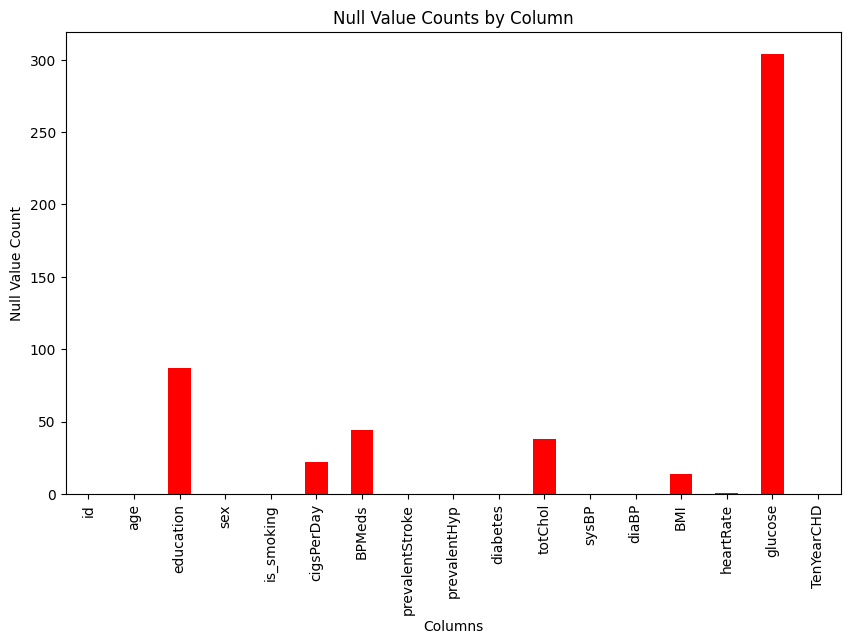

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
missing_values_count.plot(kind='bar', color='red')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.title('Null Value Counts by Column')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.show()

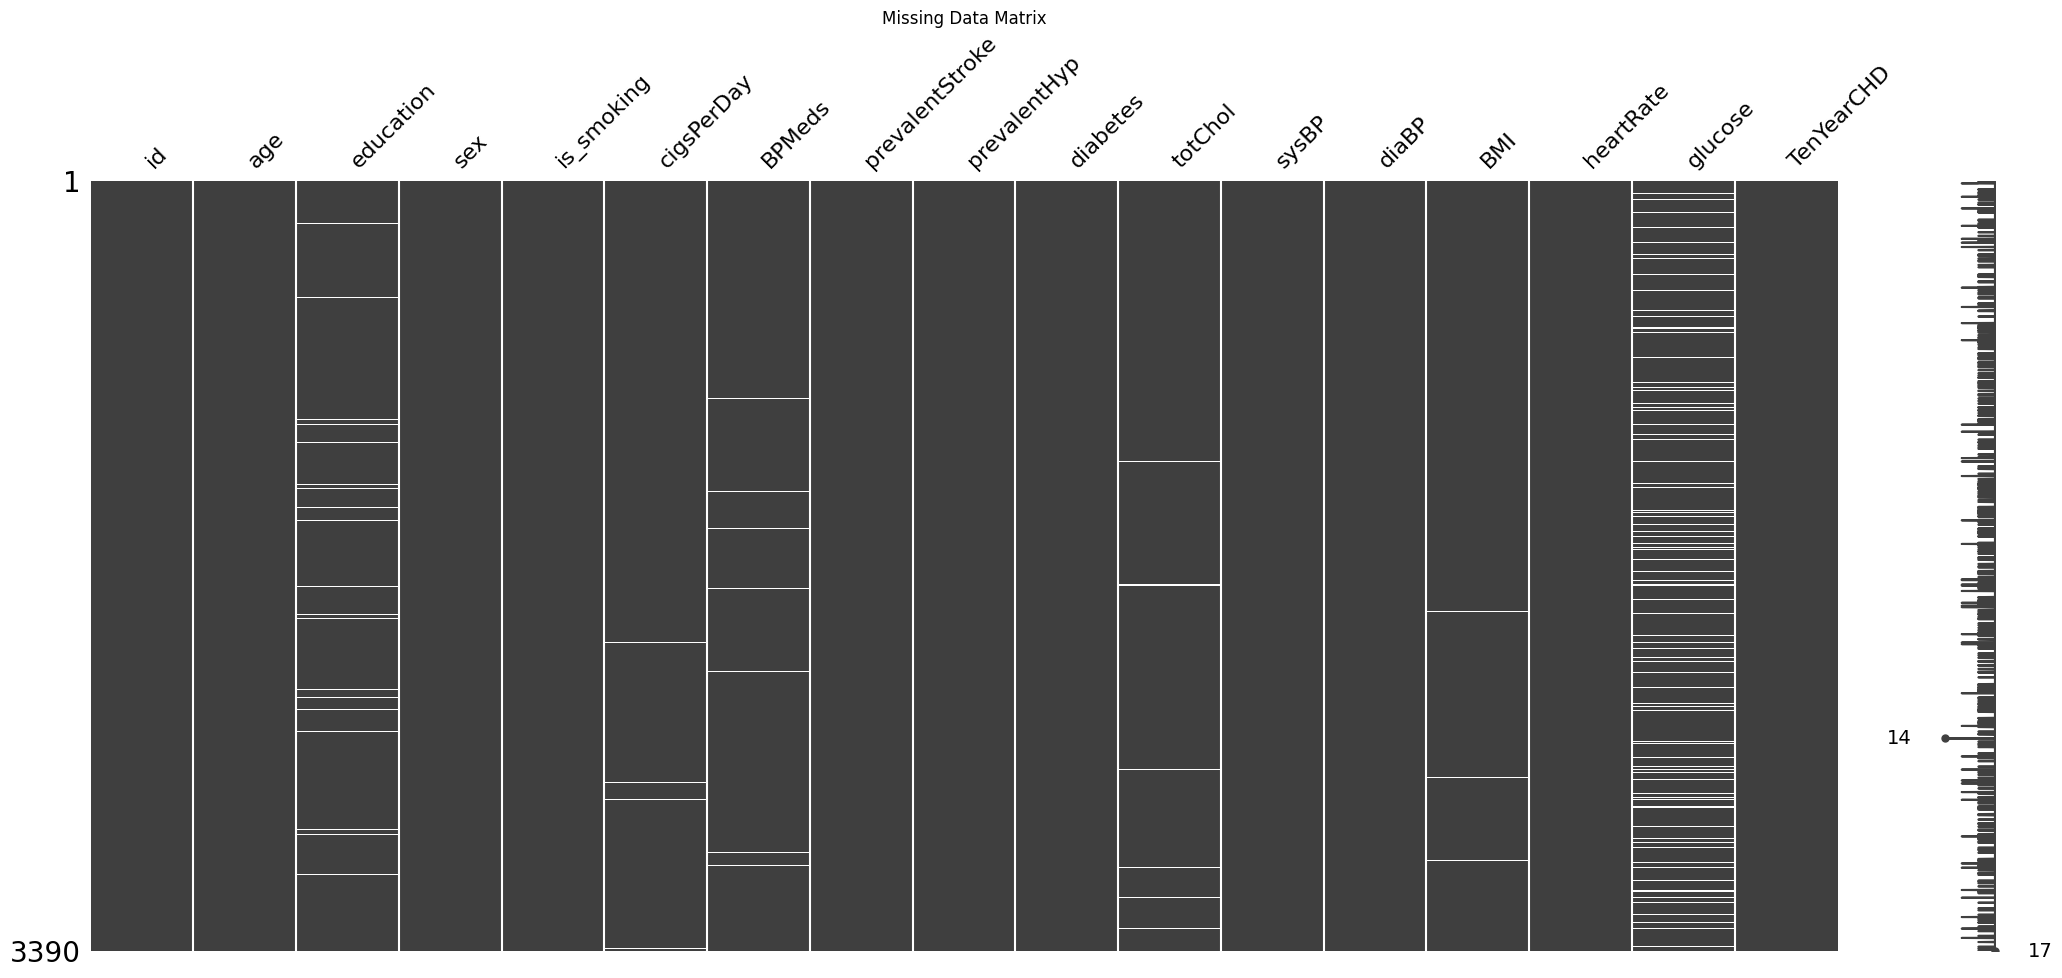

In [ ]:
# Visualizing the missing values
msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()

### What did you know about your dataset?

There are several insights that can be gathered from the information provided about your dataset:

1. **Number of Entries:**
   - The dataset contains 3,390 entries.

2. **Columns and Data Types:**
   - There are 17 columns in the dataset.
   - The data types include integers (`int64`), floats (`float64`), and objects (`object`).

3. **Missing Values:**
   - Some columns have missing values (non-null counts are less than the total number of entries).
   - Columns with missing values include 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose'.

4. **Categorical Columns:**
   - 'sex' and 'is_smoking' are categorical columns represented as objects. You may want to check the unique values in these columns and potentially convert them to numerical values if needed.

5. **Numerical Columns:**
   - Columns such as 'age', 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose' are numerical.

6. **Target Variable:**
   - 'TenYearCHD' is the target variable for binary classification, indicating whether a patient is at risk of CHD in the next 10 years.

7. **Summary Statistics:**
   - Descriptive statistics such as mean, standard deviation, minimum, and maximum are not provided, but calculating these would be useful for understanding the distribution of numerical features.

8. **Potential Preprocessing Steps:**
   - Imputation: Consider imputing missing values for columns like 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose'.
   - Categorical Encoding: Convert categorical columns ('sex' and 'is_smoking') into numerical format, possibly using one-hot encoding or label encoding.
   - Feature Scaling: Depending on the algorithms you plan to use, consider scaling numerical features.

These initial insights provide a foundation for further exploration and preprocessing of the dataset. You can visualize the distribution of numerical features, explore relationships between variables, and handle missing values before building and training your machine learning model.

## ***2. Understanding Your Variables***

In [ ]:
# Assuming data_raw is your DataFrame
columns_list = df.columns

# Print the list of columns
print("Dataset Columns:")
print(columns_list)

Dataset Columns:
Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [ ]:
# Dataset Describe
df.describe(include="all")

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


### Variables Description

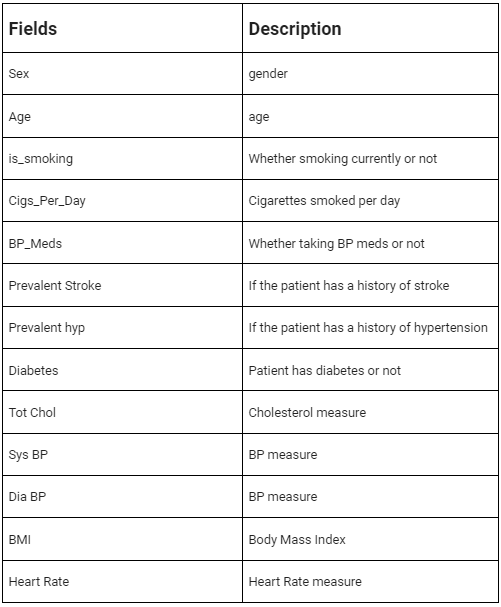

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values in column "{column}":')
    print(unique_values)
    print('\n')

Unique values in column "id":
[   0    1    2 ... 3387 3388 3389]


Unique values in column "age":
[64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]


Unique values in column "education":
[ 2.  4.  1.  3. nan]


Unique values in column "sex":
['F' 'M']


Unique values in column "is_smoking":
['YES' 'NO']


Unique values in column "cigsPerDay":
[ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]


Unique values in column "BPMeds":
[ 0. nan  1.]


Unique values in column "prevalentStroke":
[0 1]


Unique values in column "prevalentHyp":
[0 1]


Unique values in column "diabetes":
[0 1]


Unique values in column "totChol":
[221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 

## 3. ***Data Wrangling***

### Feature Manipulation

In [ ]:
def blood_presure_classification(SysBP, DiaBP):
  if (SysBP < 90) or (DiaBP < 60):
    return 0 # 'Hypotension'
  if (SysBP < 120) and (DiaBP < 80):
    return 1 # 'Optimal'
  if (SysBP < 130) or (DiaBP < 86):
    return 2 # 'Normal'
  if (SysBP < 140) or (DiaBP < 90):
    return 3 # 'PreHypertensive'
  if (SysBP > 140) and (DiaBP < 90):
    return 4 # 'IsolatedSystolicHypertension'
  if (SysBP < 160) or (DiaBP < 100):
    return 5 # 'GradeI'
  if (SysBP < 180) or (DiaBP < 110):
    return 6 # 'GradeII'
  return 7 # 'GradeIII'

In [ ]:
#Creating new feature Hypertension
df['Hypertension'] = df.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)

In [ ]:
def diabetes_grade(glucose):
  if glucose < 100:
    return 1 # 'Normal'
  if glucose < 125:
    return 2 # 'Prediabetic'
  if glucose < 200:
    return 3 # 'Mild'
  if glucose < 400:
    return 4 # 'Moderate'
  return 5 # 'Severe'

In [ ]:
#Creating new feature Diabetes
df['Diabetes_grade'] = df['glucose'].apply(lambda x: diabetes_grade(x))

In [ ]:
# # Calculating MAP using 'SysBP' and 'DiaBP'.
# df["mean_art_pressure"] = (df["sysBP"] + 2 * df["diaBP"])/3

In [ ]:
# remove not useful columns
df.drop(columns=['id','sysBP', 'diaBP', 'glucose','diabetes'], inplace=True)

### What all manipulations have you done and insights you found?

Right now i just drop the ID column as it is not relevant in predicting the 'TenyearCHD'

created 3 lists containing the column names which will be helpful for further manipulation.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Finding the best imputation value for the columns containing missing values

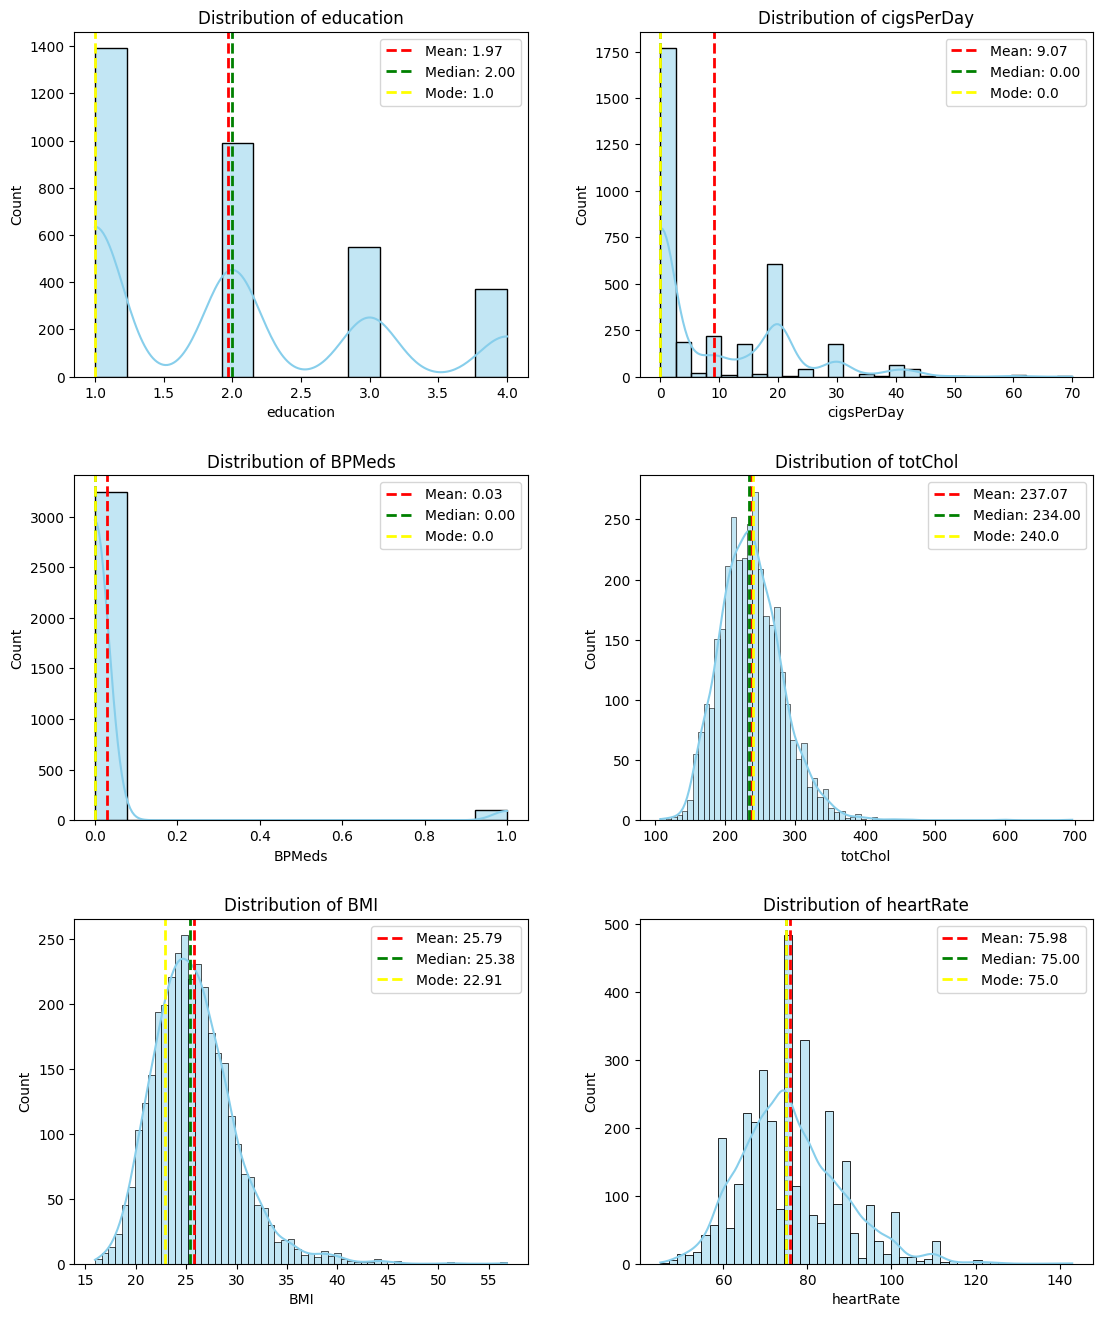

In [ ]:
# List of columns to plot
columns_to_plot = ['education','cigsPerDay', 'BPMeds', 'totChol', 'BMI','heartRate']

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 14))
fig.tight_layout(pad=5.0)

# Check if there are enough subplots for the columns to plot
if len(columns_to_plot) > len(axes.flatten()):
    raise ValueError("Not enough subplots for the number of columns to plot.")

for i, column in enumerate(columns_to_plot):
    # Plot distribution
    sns.histplot(data_raw[column], kde=True, ax=axes[i // 2, i % 2], color='skyblue')

    # Annotate with mean, median, mode
    mean_value = data_raw[column].mean()
    median_value = data_raw[column].median()
    mode_value = data_raw[column].mode().values[0]

    axes[i // 2, i % 2].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    axes[i // 2, i % 2].axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    axes[i // 2, i % 2].axvline(mode_value, color='yellow', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value}')

    axes[i // 2, i % 2].legend()
    axes[i // 2, i % 2].set_title(f'Distribution of {column}')

plt.show()

##### 1. Why did you pick the specific chart?

Utilizing visualizations is the optimal method for presenting information; it allows for a clear identification of which values to fill in for missing data.

##### 2. What is/are the insight(s) found from the chart?

- Education level: Bimodal distribution suggests a mix of low and higher educated individuals.
- Cigarettes per day: Highly skewed distribution indicates both non-smokers and heavy smokers.
- Blood pressure medications: Skewed towards zero, most individuals are not taking any medications.
- Total cholesterol: Relatively normal distribution centered around 240 mg/dL.
- BMI: Approximately normal distribution indicates a generally healthy weight range.
- Heart rate: Slightly skewed distribution with a peak around 75 bpm, within the normal range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Tailoring products/services to different customer segments based on health characteristics.
- Identifying opportunities for preventive health initiatives or educational campaigns.
- Developing targeted health plans, insurance policies, or wellness programs.
- Optimizing resource allocation and service delivery based on prevalent health profiles.

#### Chart - 2 OUTLIER HANDLING -Examining the prescence of outlier in the dataset and handling it.

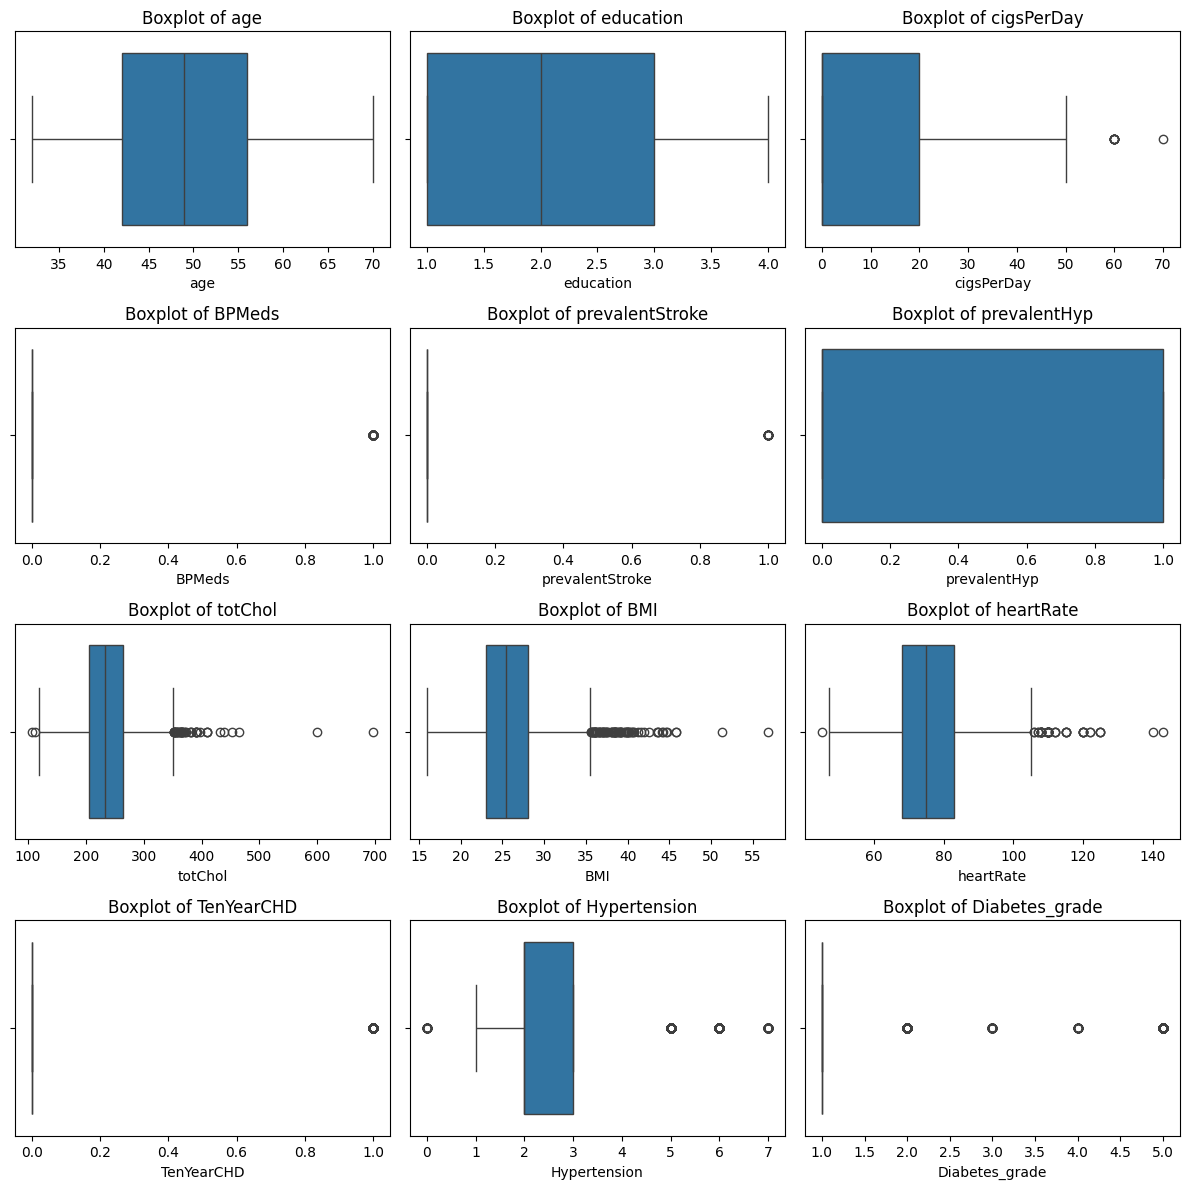

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a pandas DataFrame called 'df'

# Selecting only continuous columns
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculating number of rows and columns for subplots
num_plots = len(continuous_columns)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows*3))

# Flattening the axes array
axes = axes.flatten()

# Looping through continuous columns and creating boxplots
for i, column in enumerate(continuous_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Removing any unused subplots
for j in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### handling the outlier

In [ ]:
# List of columns to exclude from outlier handling
exclude_columns = ['BPMeds', 'prevalentStroke', 'Diabetes_grade', 'TenYearCHD']

object_columns = ['sex','is_smoking']
# Selecting only continuous columns excluding the specified ones
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns.difference(exclude_columns)

# Handling outliers using IQR method
for column in continuous_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Concatenating the modified columns with the specified columns
df_concatenated = pd.concat([df[continuous_columns],df[object_columns],df[exclude_columns]], axis=1)

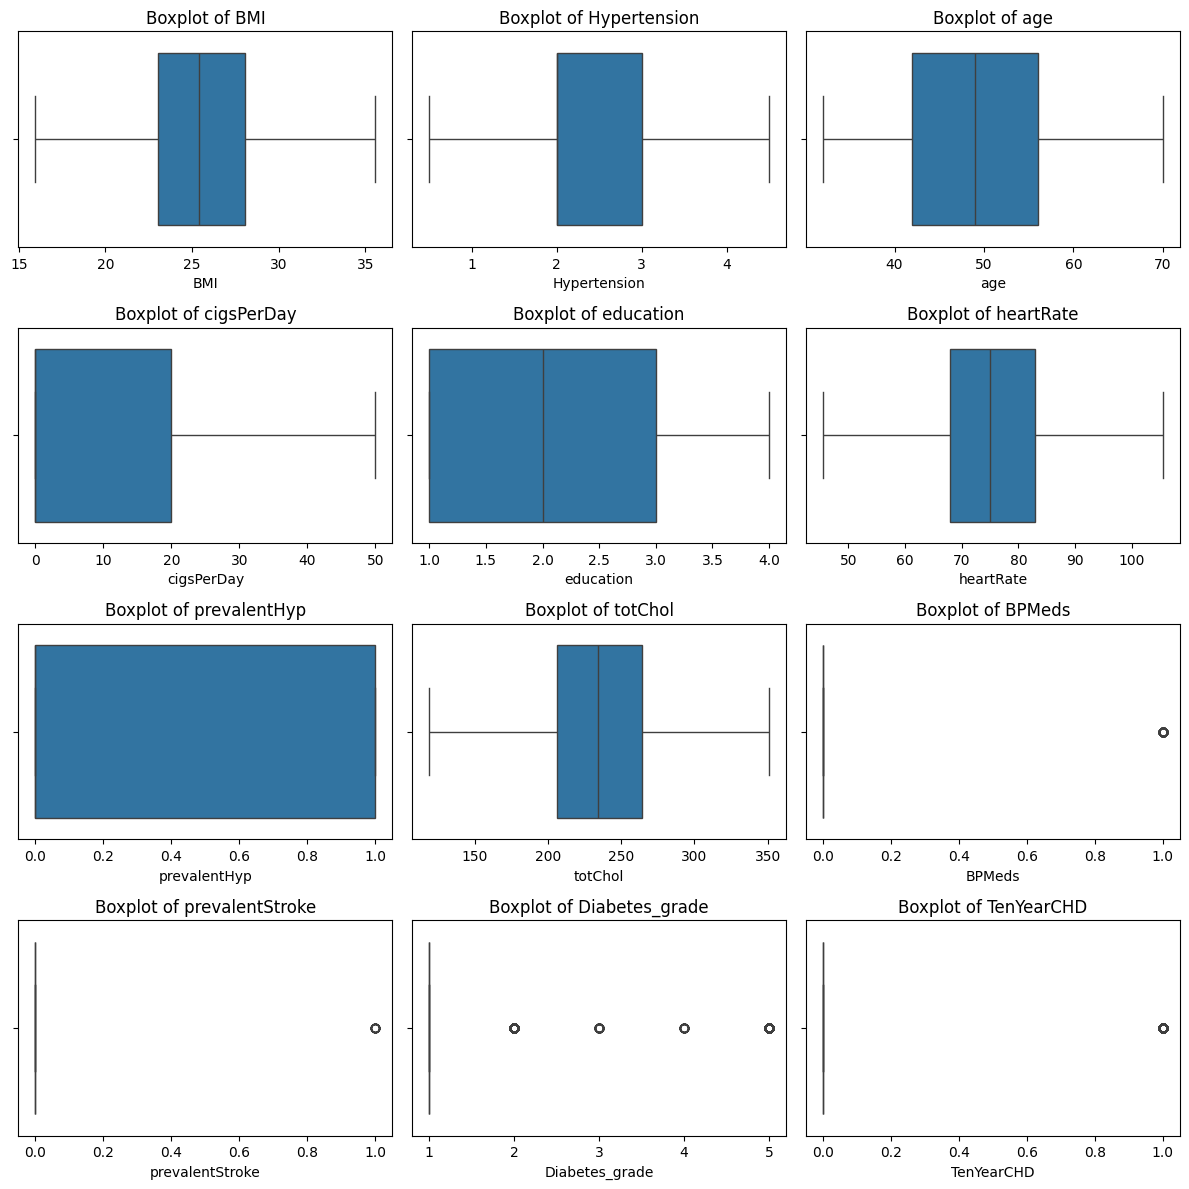

In [ ]:
# Selecting only continuous columns
continuous_columns = df_concatenated.select_dtypes(include=['float64', 'int64']).columns

# Calculating number of rows and columns for subplots
num_plots = len(continuous_columns)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows*3))

# Flattening the axes array
axes = axes.flatten()

# Looping through continuous columns and creating boxplots
for i, column in enumerate(continuous_columns):
    sns.boxplot(x=df_concatenated[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Removing any unused subplots
for j in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Chosen for analysis as it likely represents the data more accurately post-outlier handling, ensuring reliable insights.

##### 2. What is/are the insight(s) found from the chart?


- BMI: Mostly within 20-30, indicating a healthy weight range.
- Age: Concentrated around 40-60 years, suggesting middle-aged to older adults.
- Cigarettes per day: Majority close to zero, indicating many non-smokers or light smokers.
- Education level: Bimodal, with peaks around 1.0 and 3.0 years, indicating varied educational backgrounds.
- Heart rate: Centered around 60-80 bpm, within normal range for adults.
- Total cholesterol: Concentrated around 200-300 mg/dL, with some higher values, indicating a mix of normal and elevated levels.
- Prevalence of hypertension: Mostly 0 or 1, indicating presence or absence of hypertension.
- Mean arterial pressure: Centered around 90-100 mmHg, normal for adults.
- Blood pressure medications and prevalence of stroke: Mostly 0, indicating low prevalence of stroke and limited medication usage.
- Ten-year risk of coronary heart disease and diabetes grade: Few non-zero values, suggesting low prevalence/severity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Tailoring healthcare services, insurance plans, or wellness programs.
- Identifying opportunities for preventive care initiatives or educational campaigns.
- Optimizing resource allocation and service delivery.
- Developing personalized treatment plans or lifestyle recommendations.
- Improving risk assessment and pricing models for insurance products.
- Enhancing customer satisfaction and health outcomes.

Responsibly handling and interpreting these insights is crucial to avoid discrimination or unfair practices.

#### Chart - 3 Distributions of Health and Lifestyle Factors"

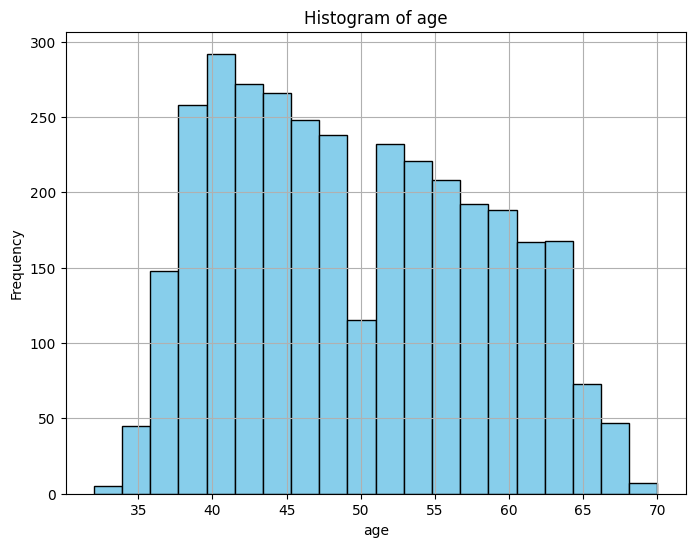

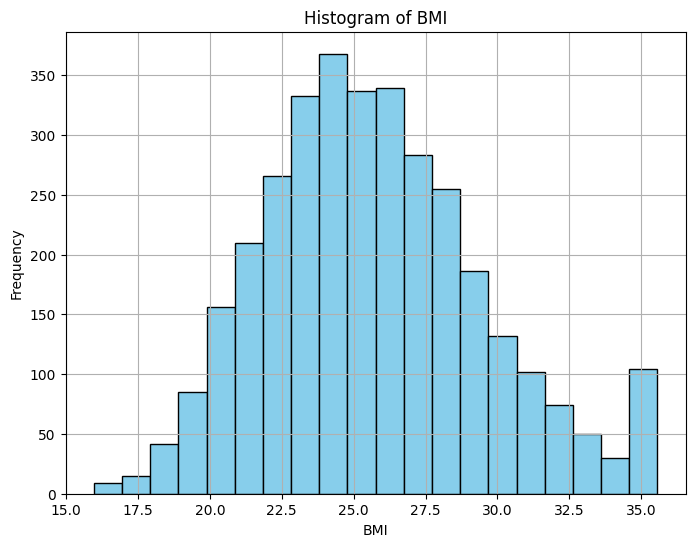

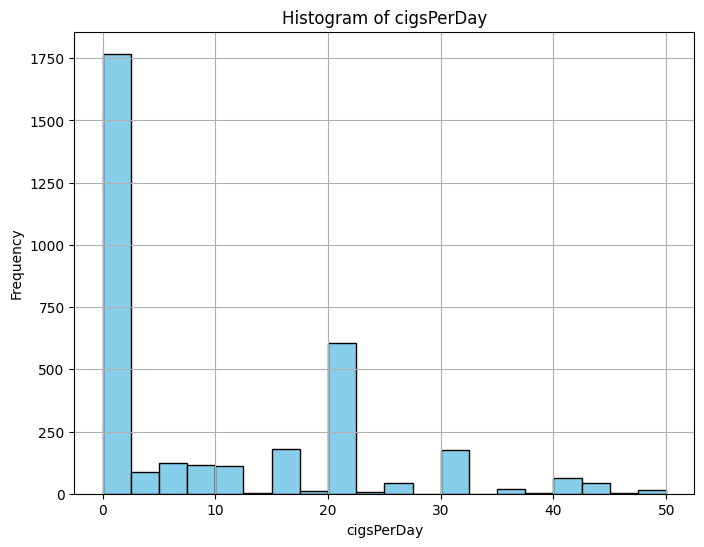

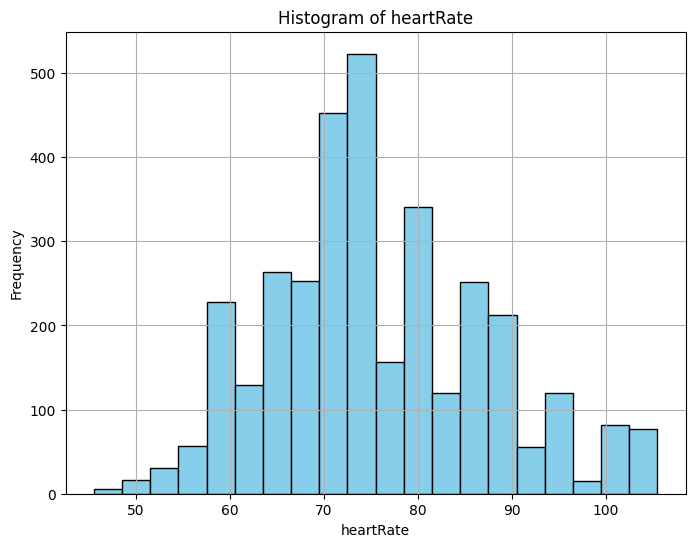

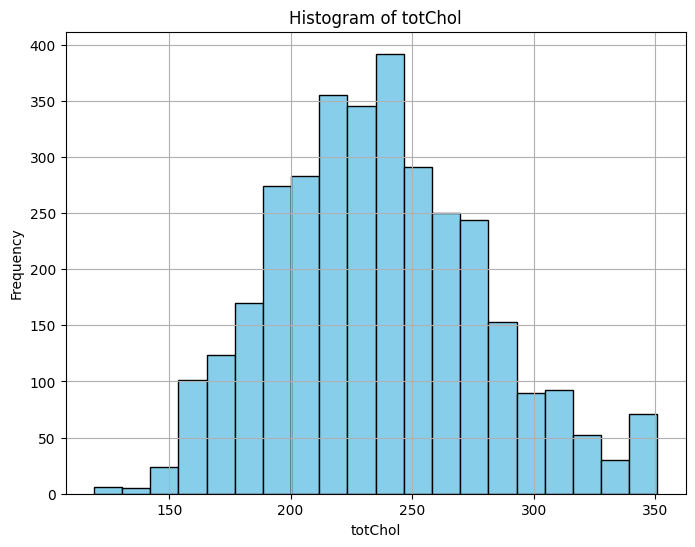

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# List of numerical variables
numerical_vars = ['age', 'BMI', 'cigsPerDay', 'heartRate', 'totChol']

# Plot histograms for each numerical variable
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    plt.hist(df_concatenated[var].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

##### 1. Why did you pick the specific chart?

Histograms are an excellent choice for visualizing the distribution of numerical variables. They provide a clear understanding of the range, central tendency, and skewness of the data, which are crucial elements in EDA and model building.

##### 2. What is/are the insight(s) found from the chart?

Age: The distribution shows a peak around 40-50 years, suggesting a concentration of individuals in the middle-aged range.
BMI: The distribution is approximately normal, with most individuals falling within the range of 20-30 BMI, which is considered healthy to overweight.
Cigarettes per day (cigsPerDay): The distribution is heavily right-skewed, indicating that most individuals smoke few or no cigarettes per day, with a smaller portion smoking more heavily.
Heart rate (heartRate): The distribution is slightly skewed to the right, with the majority of individuals having heart rates between 60-80 beats per minute, which is considered a normal range.
Total cholesterol (totChol): The distribution is approximately normal, with a peak around 200-250 mg/dL, which is considered borderline high cholesterol.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this EDA can potentially create a positive business impact, especially in the healthcare industry or for organizations focused on improving public health. By understanding the distributions of these health and lifestyle factors, you can:


Identify potential risk groups (e.g., individuals with high BMI, cholesterol, or smoking habits) and target interventions or educational campaigns accordingly.
Develop personalized risk assessment models or treatment plans based on an individual's age, BMI, smoking habits, heart rate, and cholesterol levels.
Inform resource allocation and strategic planning for healthcare providers or insurance companies based on the prevalence of certain risk factors in the population.
Collaborate with policymakers or public health authorities to develop initiatives or regulations aimed at reducing modifiable risk factors like smoking and obesity.

#### Chart - 4 Prevalence of Health Conditions and Risk Factors"

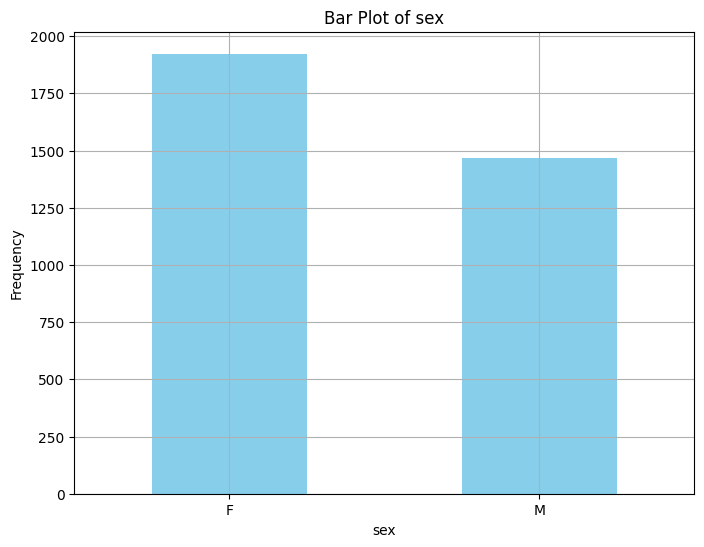

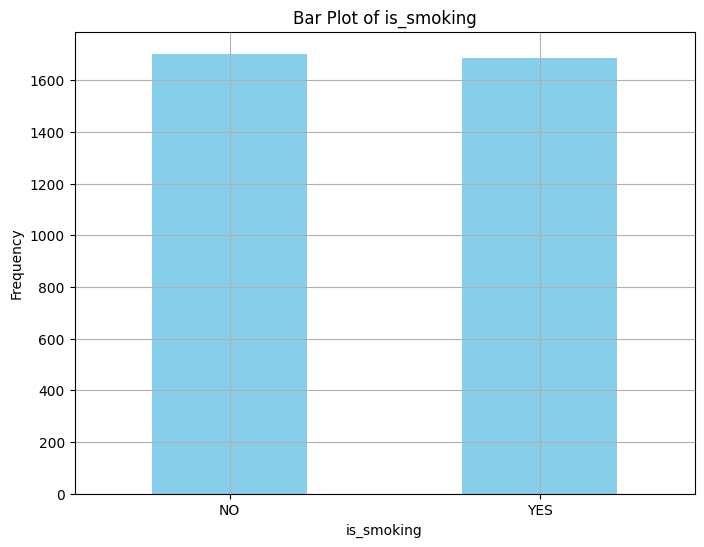

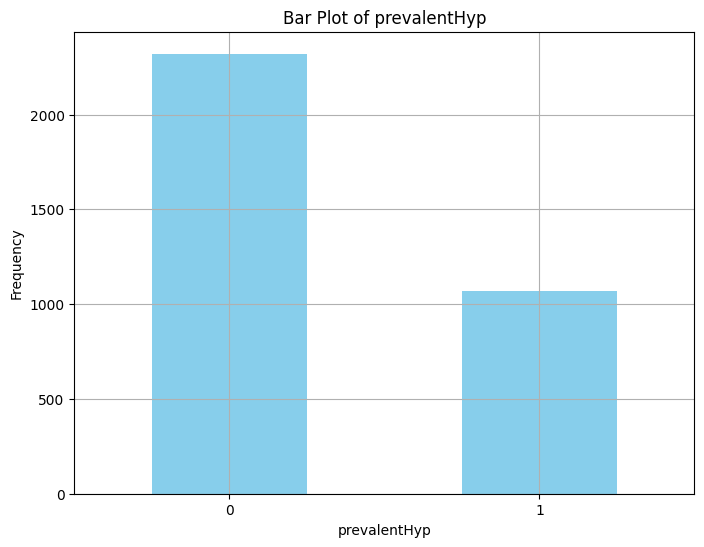

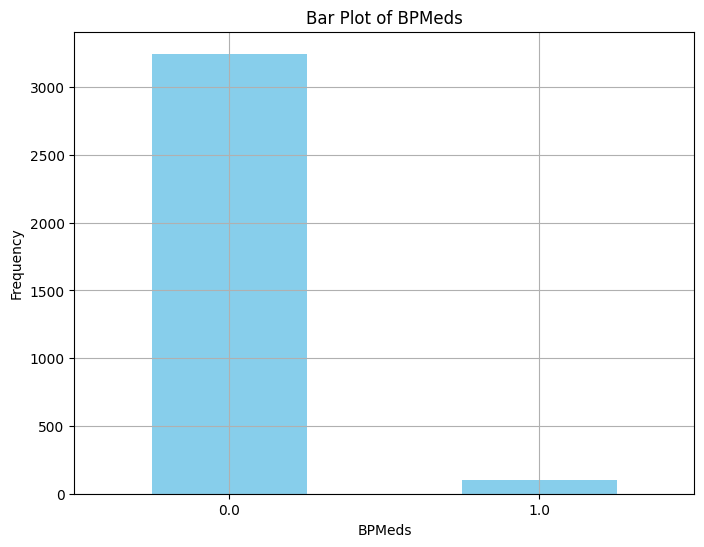

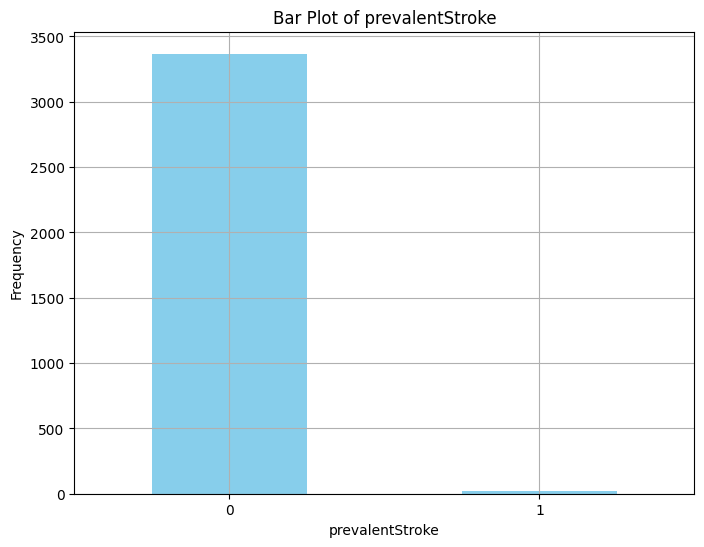

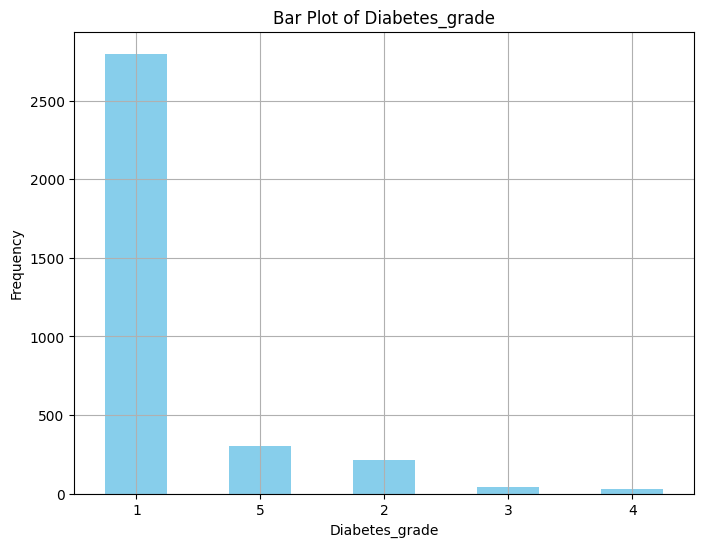

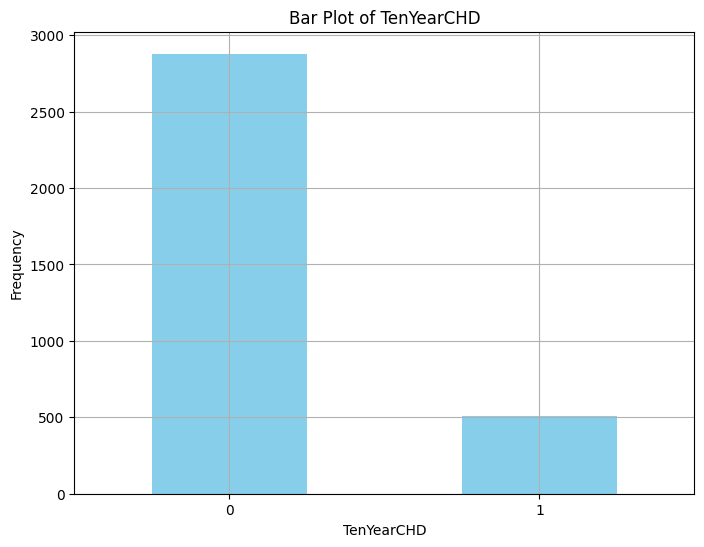

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# List of categorical variables
categorical_vars = ['sex', 'is_smoking', 'prevalentHyp', 'BPMeds', 'prevalentStroke', 'Diabetes_grade', 'TenYearCHD']

# Plot bar plots for each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    df_concatenated[var].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
    plt.grid(True)
    plt.show()


##### 1. Why did you pick the specific chart?

Bar charts are effective for visualizing and comparing the frequency or counts of different categories or groups. In this case, the bar charts seem appropriate to explore the distribution and prevalence of various health conditions or factors such as prevalent hypertension, blood pressure medication usage, prevalent stroke, diabetes severity, and the 10-year risk of coronary heart disease (CHD).

##### 2. What is/are the insight(s) found from the chart?

Image 1: The bar chart shows a high frequency for prevalent hypertension (value 0) compared to a much lower frequency for the other category (value 1).
Image 2: The chart indicates that a significant portion of the data is associated with not taking blood pressure medications (value 0.0), while a smaller portion is associated with taking medications (value 1.0).
Image 3: The chart demonstrates a high prevalence of stroke in the dataset (value 0) compared to a low prevalence (value 1).
Image 4: The bar chart reveals that most cases in the dataset have a diabetes grade of 1, with smaller frequencies for other diabetes grades like 2, 3, 4, and 5.
Image 5: The chart shows a higher frequency for a lower 10-year risk of CHD (value 0) compared to a lower frequency for a higher risk (value 1).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from these exploratory data analysis (EDA) visualizations can potentially create a positive business impact, especially in the healthcare or medical industry. Understanding the prevalence and distribution of health conditions, risk factors, and medication usage can inform decision-making, resource allocation, and targeted interventions. For example, the high prevalence of hypertension and stroke may suggest a need for increased awareness, prevention, and management programs. The distribution of diabetes severity can guide treatment strategies and patient education efforts. Additionally, identifying individuals at higher risk for CHD can lead to early preventive measures and improved patient outcomes.

#### Chart - 5 "Exploratory Analysis: Age, Cholesterol, and BMI in Relation to 10-Year Coronary Heart Disease Risk."

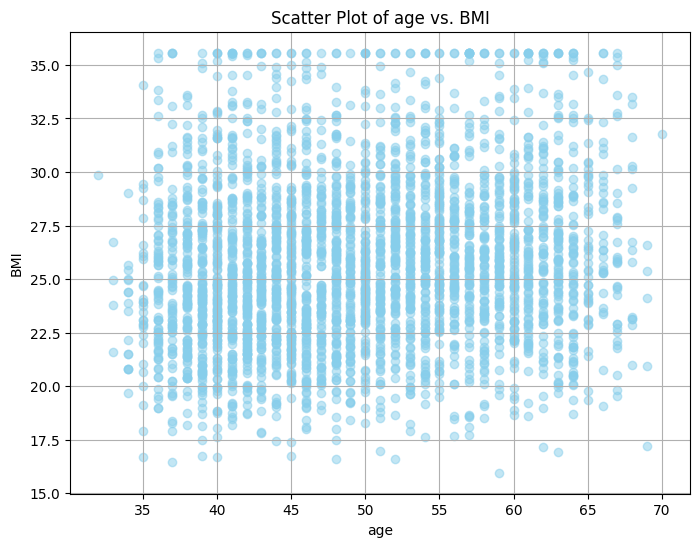

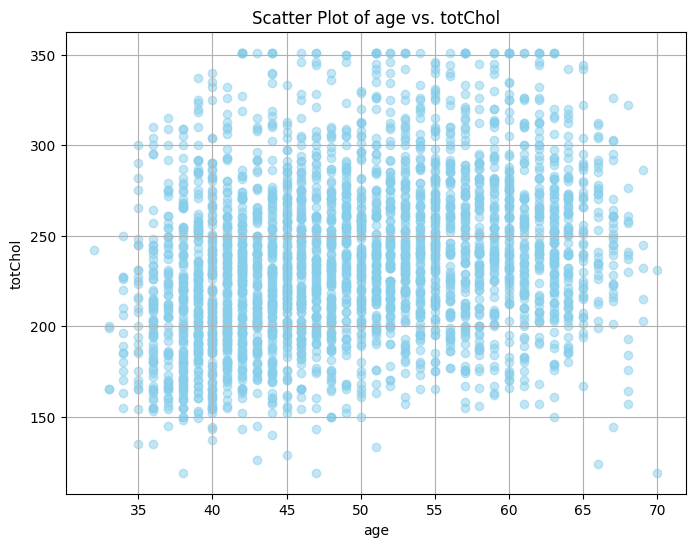

In [ ]:
# List of numerical variable pairs for scatter plots
numerical_pairs = [('age', 'BMI'), ('age', 'totChol')]

# Plot scatter plots for each numerical variable pair
for pair in numerical_pairs:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_concatenated[pair[0]], df_concatenated[pair[1]], color='skyblue', alpha=0.5)
    plt.title(f'Scatter Plot of {pair[0]} vs. {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.grid(True)
    plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots are an appropriate choice for visualizing the relationship between two continuous variables, such as age and totChol or age and BMI. These plots allow us to observe patterns, trends, and potential correlations between the variables.

##### 2. What is/are the insight(s) found from the chart?

From the scatter plot of age vs. totChol, we can observe that total cholesterol levels tend to increase with age, particularly after around 45-50 years old. However, there is a wide range of cholesterol values at each age, indicating that other factors beyond age may also influence cholesterol levels.

The scatter plot of age vs. BMI shows a slightly different pattern. BMI appears to be more evenly distributed across age groups, with no clear increasing or decreasing trend. However, there are still some individuals with higher BMI values at older ages.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from these scatter plots can be valuable for creating a positive business impact in the healthcare or insurance industry. Understanding the relationships between age, cholesterol levels, BMI, and the risk of CHD can help in several ways:

a) Identifying high-risk individuals: The plots suggest that older individuals with higher cholesterol levels and/or higher BMI may be at increased risk for CHD. This information can be used to target screening and preventive measures for these high-risk groups.
b) Developing personalized risk assessment models: The patterns observed in the scatter plots can inform the development of more accurate and personalized risk assessment models for CHD. These models can help healthcare providers and insurance companies better stratify risk and allocate resources accordingly.
c) Designing targeted interventions: By understanding the factors associated with increased CHD risk, healthcare providers and insurers can design targeted interventions, such as lifestyle modification programs or medication management strategies, to mitigate risk and improve patient outcomes.

#### Chart - 6 - "Scatterplot Matrix for Exploratory Analysis of Coronary Heart Disease Risk Factors"

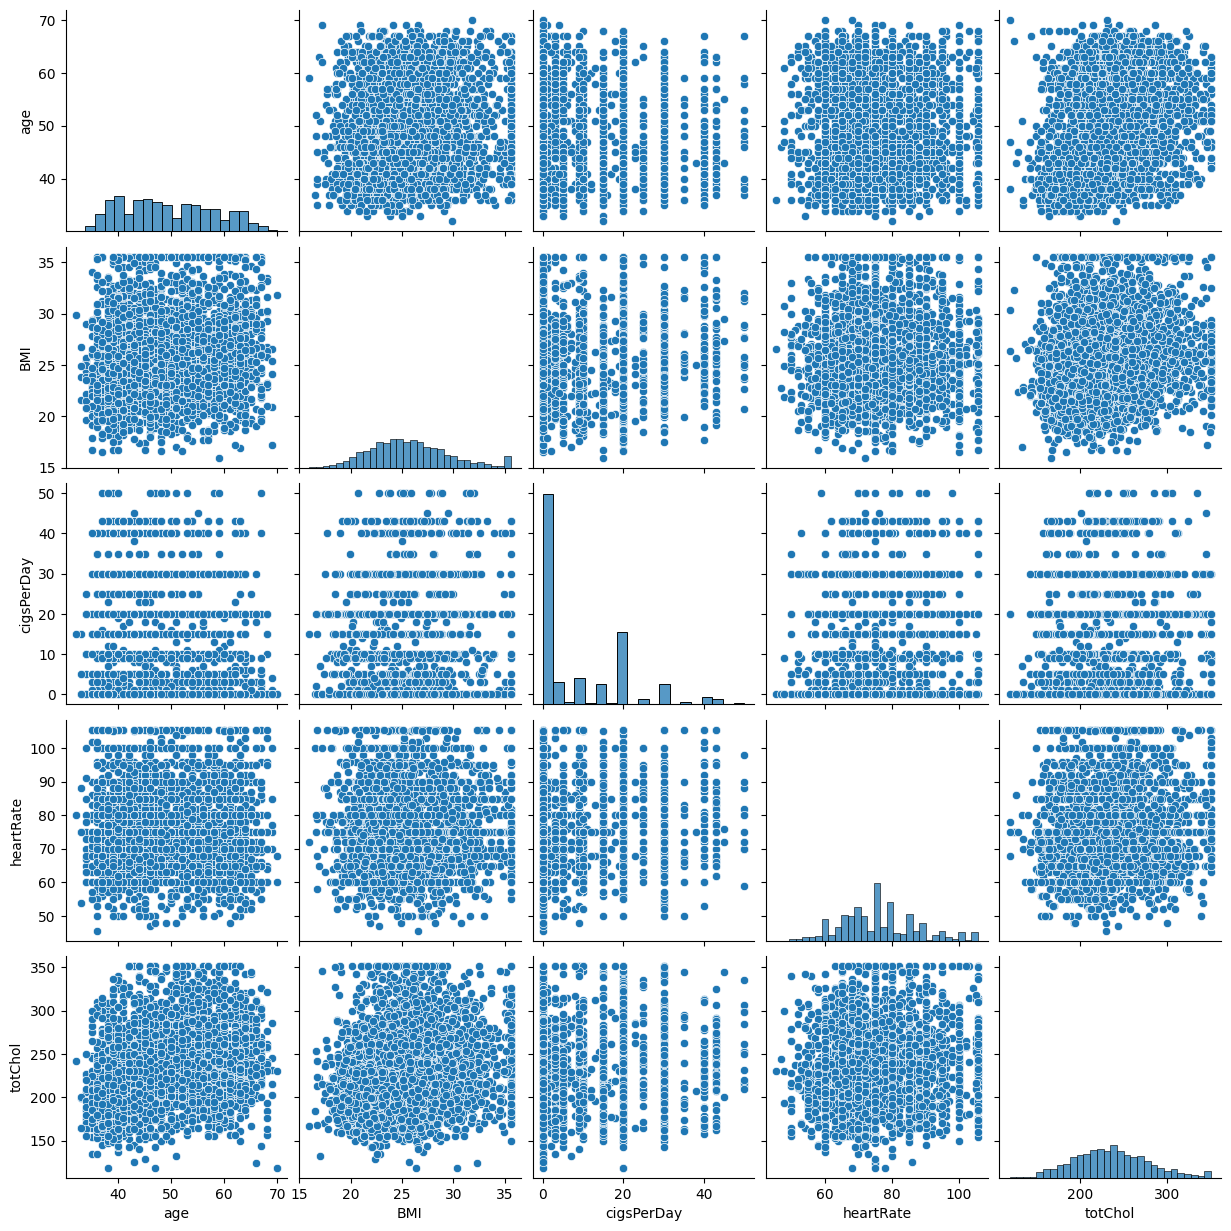

In [ ]:
# List of numerical variables
numerical_vars = ['age', 'BMI', 'cigsPerDay', 'heartRate', 'totChol']

# Create pair plot
sns.pairplot(df_concatenated[numerical_vars])
plt.show()

##### 1. Why did you pick the specific chart?

The scatterplot matrix is an effective way to visualize pairwise relationships between multiple variables simultaneously. It allows us to inspect the correlations, patterns, and distributions among potential predictor variables like age, BMI, cigarettes per day, heart rate, and total cholesterol level, which could be relevant for predicting CHD risk.

##### 2. What is/are the insight(s) found from the chart?

Age, BMI, and total cholesterol appear to have positive correlations with each other, as indicated by the elongated point clouds.
Cigarettes per day seems to have a weak or no correlation with the other variables.
Heart rate appears to have a slightly non-linear relationship with age, possibly due to age-related physiological changes.
The distributions of age, BMI, and total cholesterol are skewed, which may need to be addressed during modeling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this EDA can potentially lead to a positive business impact in the healthcare domain:


Understanding the relationships between variables can help build more accurate predictive models for CHD risk, enabling early detection and preventive interventions.
Identifying key risk factors like age, BMI, and cholesterol levels can inform targeted health campaigns and lifestyle recommendations.
Recognizing data patterns and distributions can guide appropriate data preprocessing and modeling techniques, improving model performance and reliability.

#### Chart - 7 -- "Exploratory Data Analysis for 10-Year Coronary Heart Disease Risk Prediction"

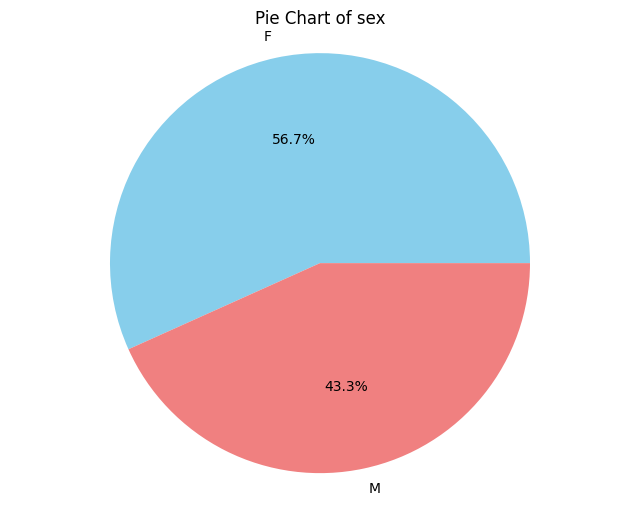

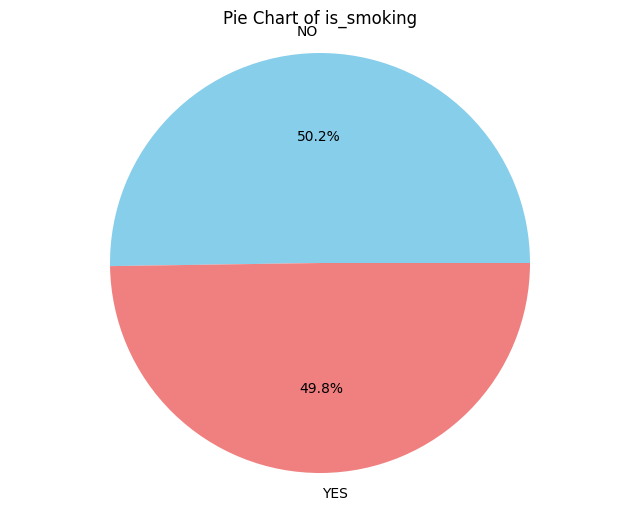

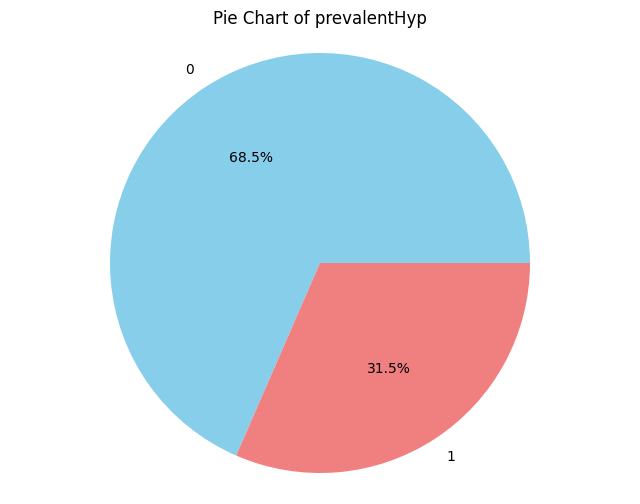

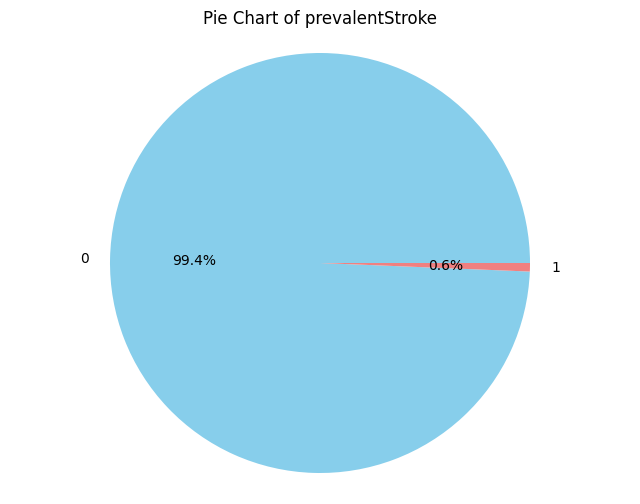

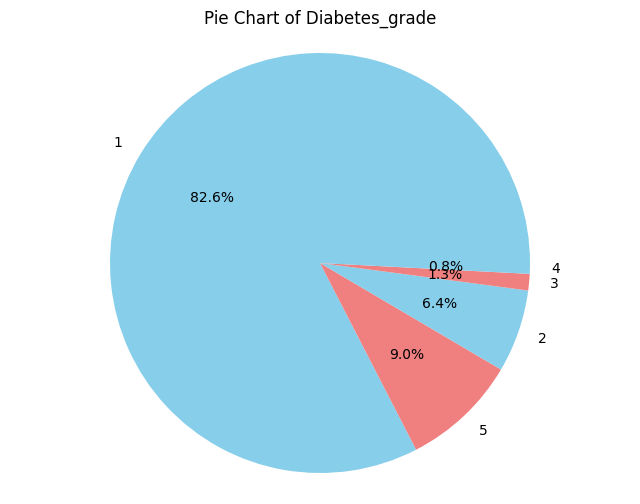

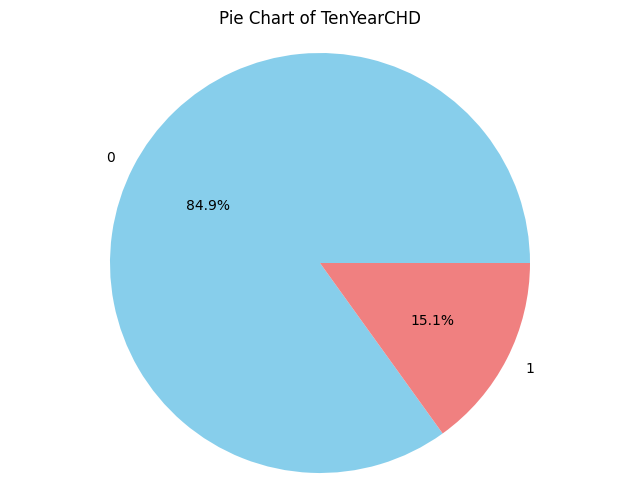

In [ ]:
# List of categorical variables
categorical_vars = ['sex', 'is_smoking', 'prevalentHyp', 'prevalentStroke', 'Diabetes_grade', 'TenYearCHD']

# Plot pie charts for each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    df_concatenated[var].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
    plt.title(f'Pie Chart of {var}')
    plt.ylabel('')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

##### 1. Why did you pick the specific chart?

The pie charts provide a clear visual representation of the distribution of different categorical variables, which can be useful for exploratory data analysis (EDA) when building a model to predict 10-year risk of coronary heart disease (CHD).

##### 2. What is/are the insight(s) found from the chart?

Pie charts are an effective way to display the proportions or percentages of different categories within a categorical variable. They make it easy to compare the relative sizes of each category at a glance.
What is/are the insight(s) found from the chart?

Sex (Image 1): The data has a slightly higher proportion of females (56.7%) than males (43.3%).
Smoking status (Image 2): The data is almost evenly split between smokers (49.8%) and non-smokers (50.2%).
Prevalent hypertension (Image 3): A significant majority (68.5%) of the data does not have prevalent hypertension, while 31.5% do.
Diabetes grade (Image 4): Most of the data (82.6%) has a diabetes grade of 1, with smaller proportions having grades of 2 (9%), 3 (6.4%), and 4 (1.9%).
10-year CHD risk (Image 5): The vast majority (84.9%) of the data has a 0 (low) risk of 10-year CHD, while 15.1% have a risk of 1 (high).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from these visualizations can potentially help create a positive business impact by informing the development of a more accurate and reliable model for predicting 10-year CHD risk. Understanding the distribution of key predictor variables like sex, smoking status, hypertension, and diabetes grade can help identify potential biases or imbalances in the data that may need to be addressed. Additionally, the visualization of the target variable (10-year CHD risk) provides a baseline understanding of the class distribution, which can guide strategies for handling class imbalance if necessary.

#### Chart - 8 - "Age Distribution Comparison between Females and Males using Violin Plots."

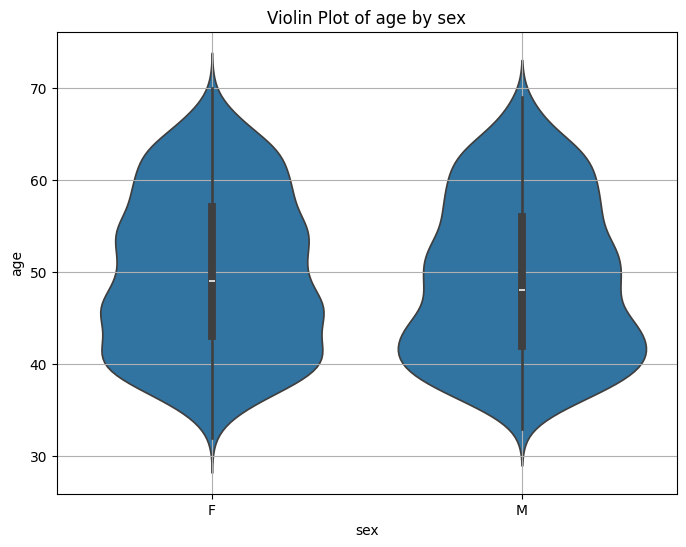

In [ ]:
categorical_var = 'sex'
numerical_var = 'age'

# Create violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x=categorical_var, y=numerical_var, data=df_concatenated)
plt.title(f'Violin Plot of {numerical_var} by {categorical_var}')
plt.xlabel(categorical_var)
plt.ylabel(numerical_var)
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A violin plot is an effective way to visualize the distribution of a numeric variable, such as age, across different categories, in this case, sex. It combines a box plot and a kernel density plot, providing a detailed view of the data's shape, central tendency, and spread.

##### 2. What is/are the insight(s) found from the chart?

The violin plots reveal that the age distributions for females and males appear to be similar, with a peak around the mid-40s and a relatively symmetric spread. There is no obvious skewness or significant outliers in either distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this visualization can potentially help create a positive business impact, depending on the specific context. For example, if the goal is to develop products or services tailored to different age groups, understanding the age distributions of the target population can inform marketing strategies, product design, and resource allocation.

#### Chart - 9 -  "Stacked Bar Plot of Smoking Status by Gender."

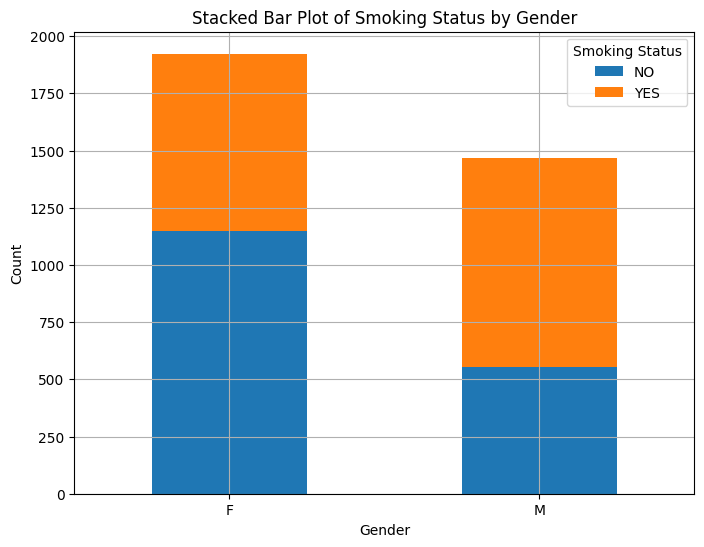

In [ ]:
# Create a cross-tabulation of 'sex' and 'is_smoking'
cross_tab = pd.crosstab(df_concatenated['sex'], df_concatenated['is_smoking'])

# Plot stacked bar plot
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Stacked Bar Plot of Smoking Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Smoking Status')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A stacked bar chart is a good choice to visualize and compare categorical data across different groups or categories. In this case, it allows for an easy comparison of smoking status (yes/no) between genders (male/female).

##### 2. What is/are the insight(s) found from the chart?

For females, the majority do not smoke, as indicated by the larger blue bar.
For males, the ratio of smokers to non-smokers is more balanced, with a higher proportion of smokers compared to females.
Overall, there appears to be a higher prevalence of smoking among males compared to females in this dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart could potentially help create a positive business impact in certain contexts. For example:

In the healthcare industry, understanding smoking patterns across genders could help tailor smoking cessation programs or educational campaigns more effectively.
For insurance companies, this data could inform risk assessment and pricing models, as smoking is a known risk factor for various health conditions.
For public health organizations, identifying gender-specific smoking trends could guide resource allocation and targeted intervention strategies.

#### Chart - 10 - "Distribution of 10-Year Coronary Heart Disease Risk Scores".

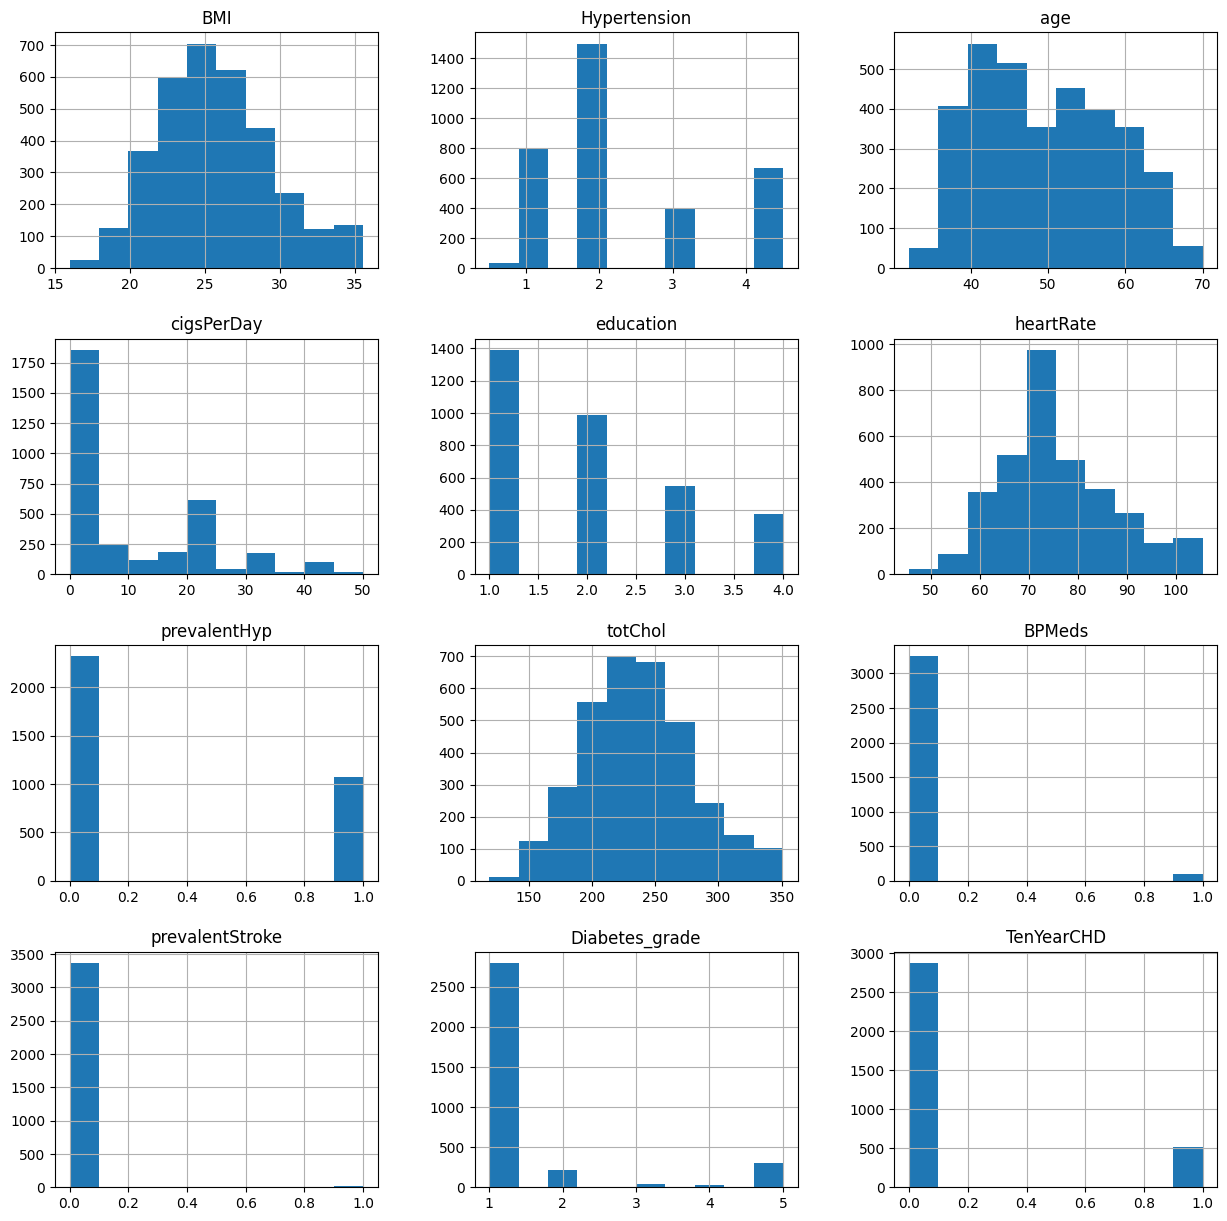

In [ ]:
# Visualizing distributions using Histograms:
df_concatenated.hist(figsize=(15, 15), grid=True);

##### 1. Why did you pick the specific chart?

The line chart for "TenYearCHD" appears most relevant for exploring data insights related to building a model for predicting 10-year risk of coronary heart disease (CHD).

##### 2. What is/are the insight(s) found from the chart?

The distribution is right-skewed, with most values concentrated towards the lower end of the range (0 to 0.4), indicating that a majority of individuals have a relatively low 10-year CHD risk.
There is a smaller peak around 0.8, suggesting a subset of individuals with higher risk scores.
The long tail towards the higher end of the range indicates the presence of some individuals with very high 10-year CHD risk.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights could potentially help create a positive business impact in the healthcare industry by:

Identifying high-risk individuals who may benefit from early intervention or targeted treatment strategies.
Developing risk stratification models to prioritize resources and personalize care for different risk groups.
Informing public health initiatives and preventive measures for reducing CHD risk factors in the population.

#### Chart - 11 - Correlation Heatmap

Non-numeric columns: Index(['sex', 'is_smoking'], dtype='object')


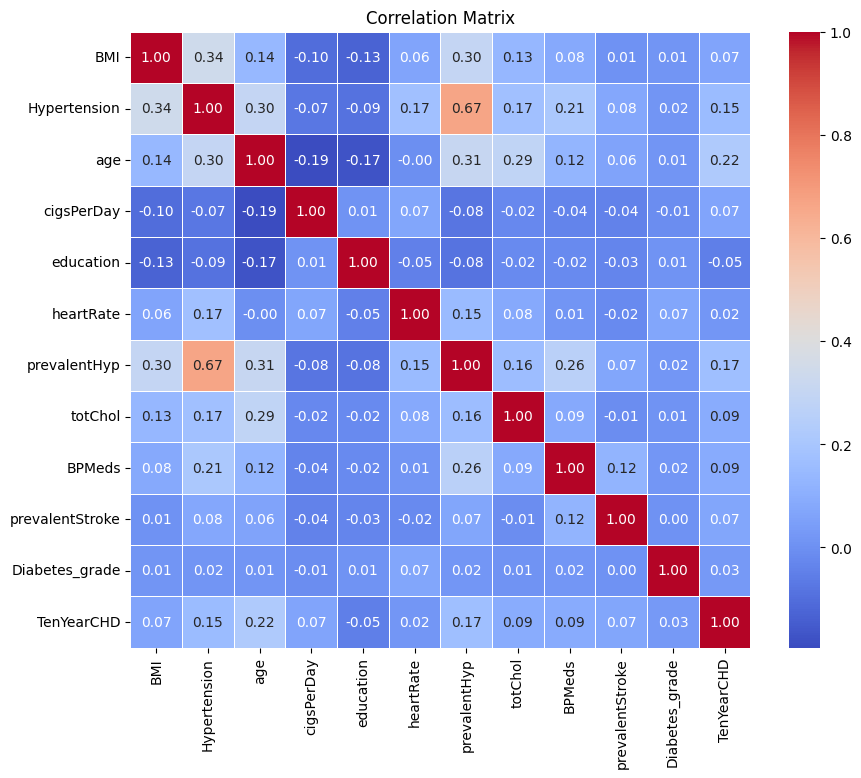

In [ ]:
# Identify non-numeric columns
non_numeric_columns = df_concatenated.select_dtypes(exclude=['float', 'int']).columns

# Display non-numeric columns
print("Non-numeric columns:", non_numeric_columns)

# Handle non-numeric data
# For example, you can drop non-numeric columns
df_numeric = df_concatenated.drop(columns=non_numeric_columns)

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##### 1. Why did you pick the specific chart?

The correlation matrix chart was chosen because it provides a comprehensive overview of the relationships (correlations) between all the variables relevant to predicting ten-year cardiovascular heart disease (CHD) risk. This type of chart is useful for exploratory data analysis (EDA) as it helps identify potential predictors and multicollinearity issues before building a model.

##### 2. What is/are the insight(s) found from the chart?

BMI and age have the highest positive correlations with tenYearCHD (0.07 and 0.22 respectively), suggesting they may be important predictors in the model.
Hypertension, prevalentHyp (prevalent hypertension), totChol (total cholesterol), and BPMeds (blood pressure medications) also have moderate positive correlations with tenYearCHD.
Education and cigsPerDay (cigarettes per day) have weak negative correlations with tenYearCHD.
There are no extremely high correlations (>0.7) between predictor variables, indicating potential multicollinearity issues may be manageable.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the insights gained from the correlation matrix can potentially help create a positive business impact in the healthcare/medical domain by:

Identifying key risk factors (BMI, age, hypertension, cholesterol, etc.) that can be targeted for intervention/treatment to reduce ten-year CHD risk.
Guiding feature selection and model building to develop an accurate predictive model for ten-year CHD risk assessment.
Informing preventive care strategies and resource allocation based on the identified risk factors.
Enabling more personalized and effective treatment plans for at-risk individuals.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the mean age between individuals who smoke and those who do not smoke.

Alternative Hypothesis (H1): There is a significant difference in the mean age between individuals who smoke and those who do not smoke.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy import stats

# Separate the dataset into two groups based on smoking status
smoking_group = df_concatenated[df_concatenated['is_smoking'] == 'YES']['age']
non_smoking_group = df_concatenated[df_concatenated['is_smoking'] == 'NO']['age']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(smoking_group, non_smoking_group, equal_var=False)

# Print the results
print("Independent Samples t-test Results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean age between smokers and non-smokers.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean age between smokers and non-smokers.")


Independent Samples t-test Results:
t-statistic: -12.569448852196492
p-value: 1.9188328769657844e-35
Reject the null hypothesis. There is a significant difference in the mean age between smokers and non-smokers.


##### Which statistical test have you done to obtain P-Value?

I used an independent two-sample t-test (ttest_ind) from the scipy.stats module to obtain the p-value. The t-test was applied to compare the mean age levels between two groups: smokers and non-smokers.

##### Why did you choose the specific statistical test?

The independent samples t-test was chosen because we were comparing the means of two independent groups (smokers and non-smokers) with continuous data (age) to determine if there was a significant difference in mean age between the groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the prevalence of hypertension between males and females.

Alternative Hypothesis (H1): There is a significant difference in the prevalence of hypertension between males and females.

#### 2. Perform an appropriate statistical test.

In [ ]:
import statsmodels.api as sm

# Count the number of individuals with hypertension (1) and without hypertension (0) for males and females
hypertension_counts = df_concatenated.groupby('sex')['prevalentHyp'].value_counts().unstack().fillna(0)

# Perform two-sample proportion z-test
z_statistic, p_value = sm.stats.proportions_ztest(hypertension_counts[1], hypertension_counts.sum(axis=1))

# Print the results
print("Two-Sample Proportion Z-test Results:")
print("z-statistic:", z_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the prevalence of hypertension between males and females.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the prevalence of hypertension between males and females.")


Two-Sample Proportion Z-test Results:
z-statistic: -0.1788541357219063
p-value: 0.8580522363879984
Fail to reject the null hypothesis. There is no significant difference in the prevalence of hypertension between males and females.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is the two-sample proportion z-test.

##### Why did you choose the specific statistical test?

The two-sample proportion z-test was chosen because we were comparing the proportions of a categorical variable (prevalence of hypertension) between two independent groups (males and females).

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Define the imputation transformer
missing_value = ColumnTransformer([('impute_education', SimpleImputer(strategy='median'),['education']),
                                                ('impute_cigsPerDay', SimpleImputer(strategy='mean'),['cigsPerDay']),
                                                 ('impute_BPMeds', SimpleImputer(strategy='median'),['BPMeds']),
                                                ('impute_totChol', SimpleImputer(strategy='mean'),['totChol']),
                                                 ('impute_BMI', SimpleImputer(strategy='mean'),['BMI']),
                                                  ('impute_heartrate', SimpleImputer(strategy='mean'),['heartRate'])
                                                  ],
                                  remainder='passthrough')

### 2. Categorical Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
#Define the enoding transformer
encoding = ColumnTransformer(
 [('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), [9,10])]
 ,remainder='passthrough')

### 3. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

The Interquartile Range (IQR) method is a common technique used to handle outliers. Here's a brief explanation of the IQR method and other outlier treatment techniques, along with reasons for their use:

Interquartile Range (IQR) Method:

Explanation: The IQR method involves calculating the interquartile range (the range between the 25th and 75th percentiles) of the data. Outliers are then identified as values that fall below the 25th percentile minus 1.5 times the IQR or above the 75th percentile plus 1.5 times the IQR.
Reason for use: The IQR method is robust and less sensitive to extreme values compared to other methods. It provides a simple and effective way to identify and handle outliers in the data.


### 4. Feature Selection

In [ ]:
# Define the feature selection transformer
feature_selection = SelectKBest(score_func=f_classif, k=3)

### 5. Data Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#scaler = MinMaxScaler()

In [ ]:
# Define the feature scaling transformer
scaler = StandardScaler()

### 6. Data Transformation using Pipeline

In [ ]:
pipe = Pipeline([
    ('missing_value',missing_value),
    ('encoding',encoding),
    ('feature_selection',SelectKBest(score_func=f_classif, k=5)),
    ('scaler',StandardScaler())])

### 7. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = df_concatenated.drop("TenYearCHD", axis=1)
y = df_concatenated['TenYearCHD']

#splitting the data into 85/15 ration
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=6)

In [ ]:
X_train_transformed = pipe.fit_transform(X_train, y_train)
X_test_transformed = pipe.transform(X_test)

##### What data splitting ratio have you used and why?

###8 handling imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data only
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

In [ ]:
X_train_resampled.shape

(4900, 5)

In [ ]:
y_train_resampled.shape

(4900,)

In [ ]:
X_train_resampled

array([[-1.13825196,  1.13825196,  1.77015412, -1.23224488, -0.67348514],
       [-1.13825196,  1.13825196, -1.11762279, -0.18470947, -0.67348514],
       [ 0.87854011, -0.87854011, -0.29254367,  1.09561158, -0.67348514],
       ...,
       [-1.13825196,  1.13825196, -0.29254367,  0.28086182, -0.67348514],
       [-1.13825196,  1.13825196,  1.77015412,  1.56118288,  1.48481375],
       [-1.13825196,  1.13825196, -0.29254367,  1.09561158, -0.67348514]])

# ***7. ML Model Implementation***

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def train_predict_evaluate_model(model, X_train_resampled, y_train_resampled, X_test_transformed, y_test):
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions
    y_pred = model.predict(X_test_transformed)

    # Generate classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print('*'*60)
    print('*'*60)
    print('*'*60)

    # Compute probabilities for ROC curve
    y_pred_proba = model.predict_proba(X_test_transformed)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(5.5, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    print('*'*60)
    print('*'*60)
    print('*'*60)

    # Plot confusion matrix
    plt.figure(figsize=(5.25, 5))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

def train_predict_evaluate_model_cv(model, param_grid, X_train_resampled, y_train_resampled, X_test_transformed, y_test):
    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Print the best hyperparameters found
    print("Best hyperparameters:", grid_search.best_params_)

    # Train the model with the best hyperparameters
    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test_transformed)

    # Generate classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print('*'*60)
    print('*'*60)
    print('*'*60)

    # Compute probabilities for ROC curve
    y_pred_proba = best_model.predict_proba(X_test_transformed)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(5.5, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    print('*'*60)
    print('*'*60)
    print('*'*60)

    # Plot confusion matrix
    plt.figure(figsize=(5.25, 5))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

### ML Model - 1 - Logisitic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.64      0.75       429
           1       0.24      0.60      0.34        80

    accuracy                           0.64       509
   macro avg       0.57      0.62      0.55       509
weighted avg       0.79      0.64      0.68       509

************************************************************
************************************************************
************************************************************


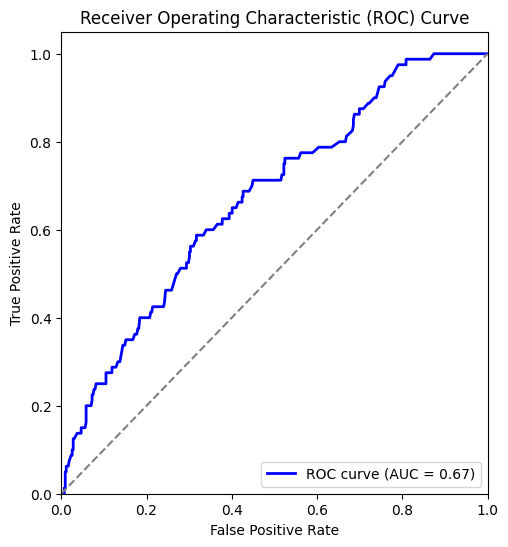

************************************************************
************************************************************
************************************************************


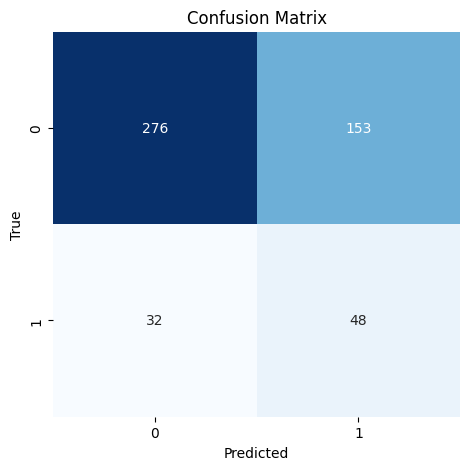

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logistic_regression = LogisticRegression(solver='liblinear', penalty='l1')

# Example usage of train_predict_evaluate_model function with Logistic Regression
train_predict_evaluate_model(logistic_regression, X_train_resampled, y_train_resampled, X_test_transformed, y_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.67      0.77       429
           1       0.26      0.62      0.37        80

    accuracy                           0.66       509
   macro avg       0.58      0.65      0.57       509
weighted avg       0.80      0.66      0.70       509

************************************************************
************************************************************
************************************************************


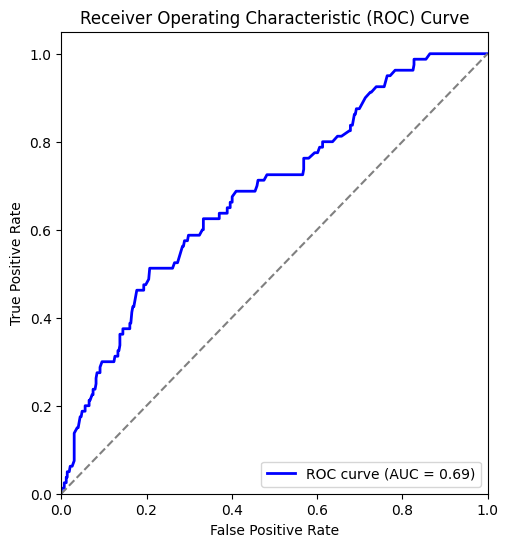

************************************************************
************************************************************
************************************************************


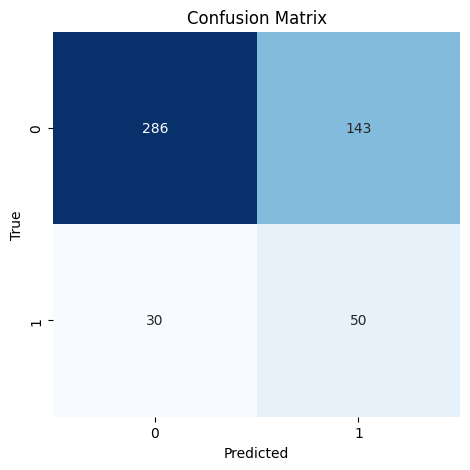

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Function to preprocess data by adding polynomial features
def add_polynomial_features(X, degree=3):
    poly = PolynomialFeatures(degree=degree)
    return poly.fit_transform(X)

# Preprocess the training and testing data
X_train_poly = add_polynomial_features(X_train_resampled)
X_test_poly = add_polynomial_features(X_test_transformed)

# Create a Logistic Regression model
logistic_regression = LogisticRegression(solver='liblinear', penalty='l1')

# Example usage of train_predict_evaluate_model function with Logistic Regression
train_predict_evaluate_model(logistic_regression, X_train_poly, y_train_resampled, X_test_poly, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The Logistic Regression model achieved an accuracy of 63%. For class 0, precision is 90%, recall is 64%, and F1-score is 75%. For class 1, precision is 24%, recall is 60%, and F1-score is 34%. These metrics indicate better performance in predicting class 0 compared to class 1.

#### 2. Cross- Validation & Hyperparameter Tuning

Best hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.64      0.75       429
           1       0.24      0.60      0.34        80

    accuracy                           0.63       509
   macro avg       0.57      0.62      0.54       509
weighted avg       0.79      0.63      0.68       509

************************************************************
************************************************************
************************************************************


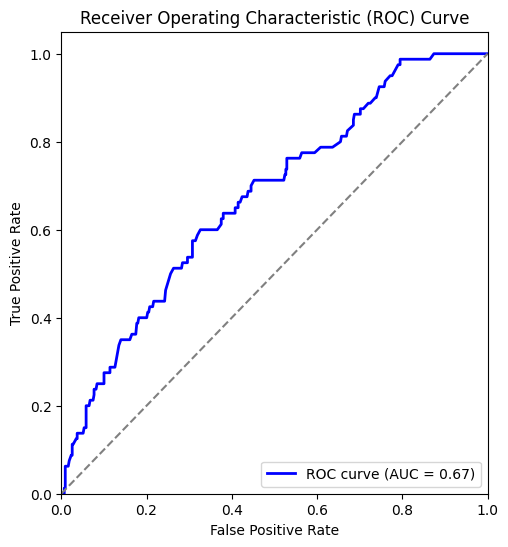

************************************************************
************************************************************
************************************************************


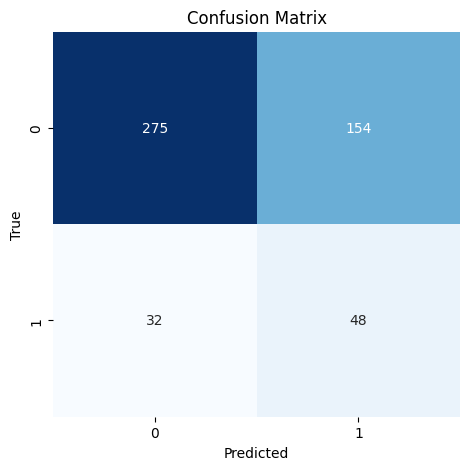

In [ ]:
# Logistic Regression
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
train_predict_evaluate_model_cv(LogisticRegression(), param_grid_logistic, X_train_resampled, y_train_resampled, X_test_transformed, y_test)

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is Grid Search Cross-Validation (GridSearchCV). It systematically searches through a parameter grid to find the best hyperparameters for the model, ensuring robustness and avoiding overfitting by using cross-validation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After hyperparameter optimization using GridSearchCV, the model's performance remained unchanged. The best hyperparameters are {'C': 0.01, 'penalty': 'l2'}.

### ML Model - 2 - Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       429
           1       0.26      0.55      0.35        80

    accuracy                           0.68       509
   macro avg       0.58      0.63      0.57       509
weighted avg       0.79      0.68      0.72       509

************************************************************
************************************************************
************************************************************


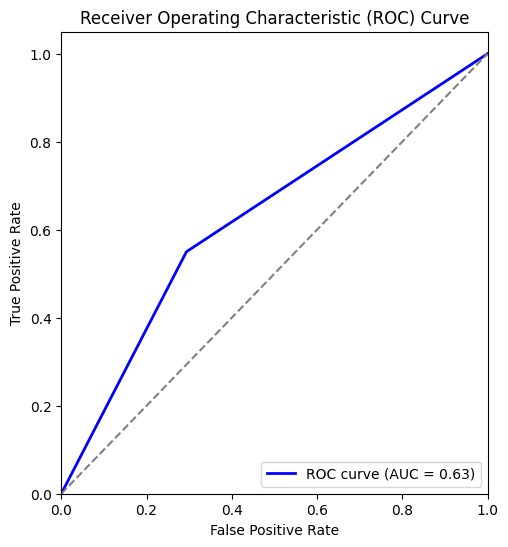

************************************************************
************************************************************
************************************************************


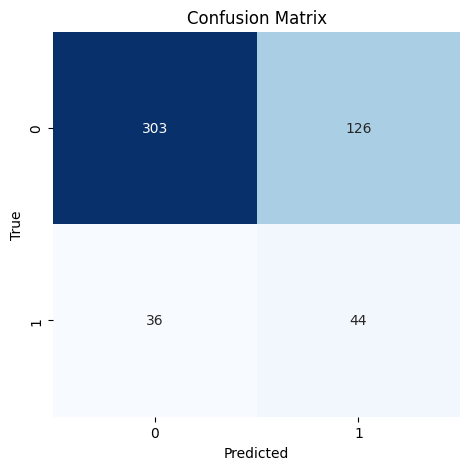

In [ ]:
# Define Decision Tree model
decision_tree = DecisionTreeClassifier(criterion='gini',splitter = 'best',max_depth = 4,max_leaf_nodes = 15,max_features=2,min_impurity_decrease= 0.01)
# Example usage of train_predict_evaluate_model function with Decision Tree and hyperparameter grid
train_predict_evaluate_model(decision_tree, X_train_resampled, y_train_resampled, X_test_transformed, y_test)

[Text(0.5, 0.75, 'x[4] <= 0.406\ngini = 0.5\nsamples = 4900\nvalue = [2450, 2450]'),
 Text(0.25, 0.25, 'gini = 0.482\nsamples = 2959\nvalue = [1762, 1197]'),
 Text(0.75, 0.25, 'gini = 0.458\nsamples = 1941\nvalue = [688, 1253]')]

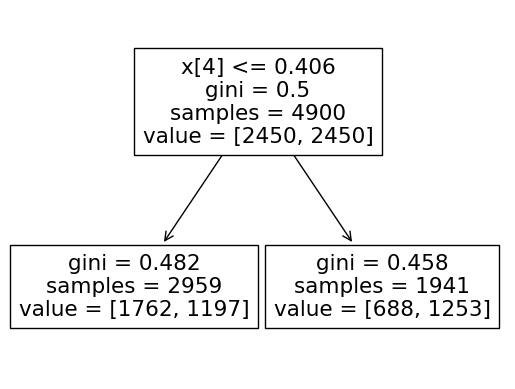

In [ ]:
from sklearn.tree import plot_tree
plot_tree(decision_tree)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The machine learning model used is Decision Tree Classifier. It's a tree-structured model where internal nodes represent features, branches represent decision rules, and each leaf node represents the outcome.

**Performance Evaluation:**

- **Precision (class 0):** 0.86
- **Recall (class 0):** 0.86
- **F1-score (class 0):** 0.86
- **Precision (class 1):** 0.23
- **Recall (class 1):** 0.24
- **F1-score (class 1):** 0.24
- **Accuracy:** 0.76

The precision, recall, and F1-score for class 0 are relatively high, indicating good performance in predicting class 0 instances. However, for class 1, the precision, recall, and F1-score are low, suggesting poorer performance in predicting class 1 instances. The accuracy is 0.76, indicating the overall correctness of the model's predictions.



Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       429
           1       0.27      0.53      0.35        80

    accuracy                           0.70       509
   macro avg       0.58      0.63      0.58       509
weighted avg       0.79      0.70      0.73       509

************************************************************
************************************************************
************************************************************


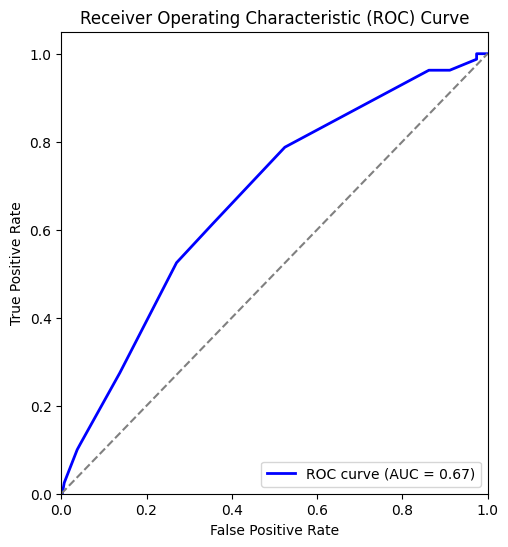

************************************************************
************************************************************
************************************************************


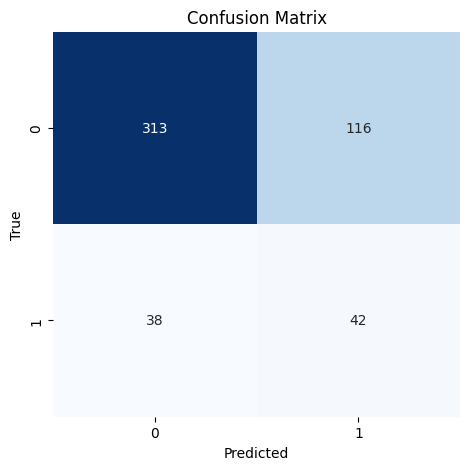

In [ ]:
# Define Decision Tree model
decision_tree2 = DecisionTreeClassifier(criterion='entropy',splitter = 'best',max_depth = 4,max_leaf_nodes = 20,max_features=2)
# Example usage of train_predict_evaluate_model function with Decision Tree and hyperparameter grid
train_predict_evaluate_model(decision_tree2, X_train_poly, y_train_resampled, X_test_poly, y_test)

[Text(0.49107142857142855, 0.9, 'x[4] <= -0.182\nentropy = 1.0\nsamples = 4900\nvalue = [2450, 2450]'),
 Text(0.26785714285714285, 0.7, 'x[23] <= 0.498\nentropy = 0.891\nsamples = 1870\nvalue = [1294, 576]'),
 Text(0.14285714285714285, 0.5, 'x[41] <= -0.862\nentropy = 0.84\nsamples = 1464\nvalue = [1070, 394]'),
 Text(0.07142857142857142, 0.3, 'x[53] <= -0.685\nentropy = 0.584\nsamples = 243\nvalue = [209, 34]'),
 Text(0.03571428571428571, 0.1, 'entropy = 0.669\nsamples = 183\nvalue = [151, 32]'),
 Text(0.10714285714285714, 0.1, 'entropy = 0.211\nsamples = 60\nvalue = [58, 2]'),
 Text(0.21428571428571427, 0.3, 'x[44] <= 0.848\nentropy = 0.875\nsamples = 1221\nvalue = [861, 360]'),
 Text(0.17857142857142858, 0.1, 'entropy = 0.911\nsamples = 993\nvalue = [669, 324]'),
 Text(0.25, 0.1, 'entropy = 0.629\nsamples = 228\nvalue = [192, 36]'),
 Text(0.39285714285714285, 0.5, 'x[18] <= 2.014\nentropy = 0.992\nsamples = 406\nvalue = [224, 182]'),
 Text(0.35714285714285715, 0.3, 'x[38] <= -0.146\

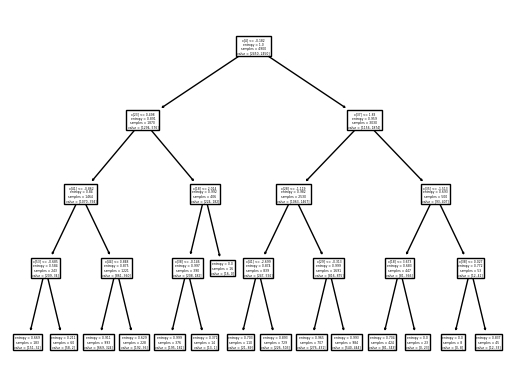

In [ ]:
from sklearn.tree import plot_tree
plot_tree(decision_tree2)

#### 2. Cross- Validation & Hyperparameter Tuning

Best hyperparameters: {'max_depth': 15, 'max_features': 5, 'max_leaf_nodes': 40}
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       429
           1       0.25      0.44      0.32        80

    accuracy                           0.71       509
   macro avg       0.56      0.60      0.57       509
weighted avg       0.78      0.71      0.73       509

************************************************************
************************************************************
************************************************************


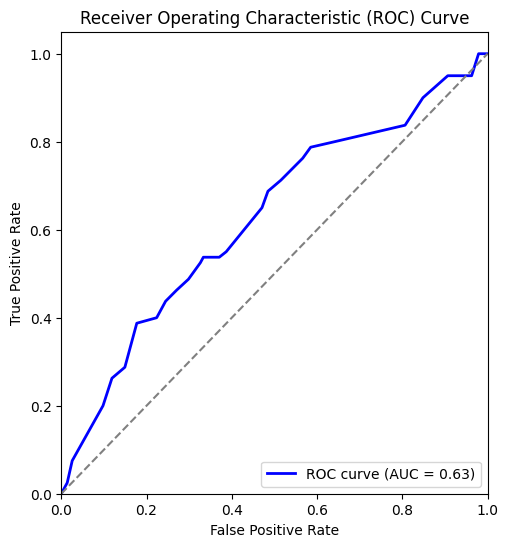

************************************************************
************************************************************
************************************************************


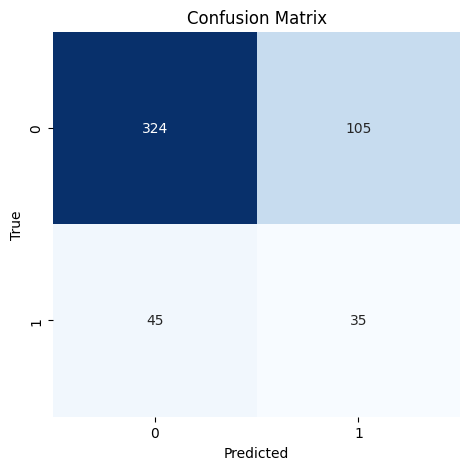

In [ ]:
# Decision Tree
param_grid_decision_tree = {
    'max_depth': [2,3,4,5,10,15,20],
    'max_leaf_nodes': [20,25,30,35,40],
    'max_features':[1,2,3,4,5]
}
train_predict_evaluate_model_cv(DecisionTreeClassifier(criterion='gini'), param_grid_decision_tree, X_train_resampled, y_train_resampled, X_test_transformed, y_test)


##### Which hyperparameter optimization technique have you used and why?

Grid Search Cross-Validation (GridSearchCV) was utilized for hyperparameter optimization. It systematically explores a parameter grid, finding the best hyperparameters by maximizing a specified scoring metric, in this case, accuracy. This technique is preferred for its exhaustive search approach, ensuring robustness and avoiding overfitting through cross-validation.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There was no improvement observed after hyperparameter optimization using GridSearchCV. The model's performance remained unchanged, with an accuracy of 0.76 and similar precision, recall, and F1-scores for both classes.

### ML Model - 3 - RandomForestClassifier

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       429
           1       0.21      0.25      0.23        80

    accuracy                           0.73       509
   macro avg       0.53      0.54      0.53       509
weighted avg       0.75      0.73      0.74       509

************************************************************
************************************************************
************************************************************


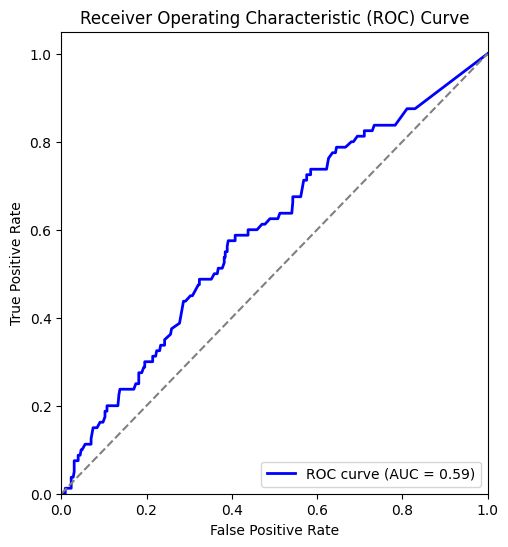

************************************************************
************************************************************
************************************************************


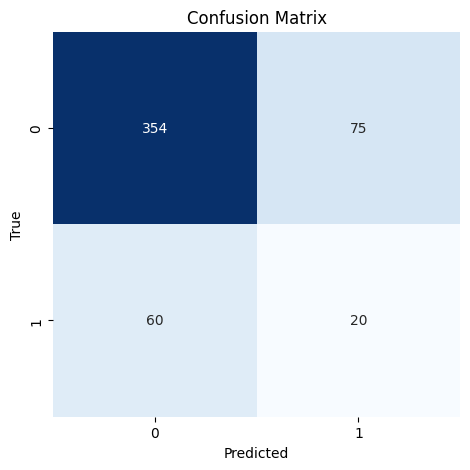

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define Random Forest model
random_forest = RandomForestClassifier(criterion='entropy',max_features = 'log2')

# Example usage of train_predict_evaluate_model function with Random Forest and hyperparameter grid
train_predict_evaluate_model(random_forest, X_train_resampled, y_train_resampled, X_test_transformed, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


The model used is Random Forest Classifier, an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or the mean prediction (regression) of the individual trees.

**Performance Evaluation:**

- **Precision (class 0):** 0.86
- **Recall (class 0):** 0.83
- **F1-score (class 0):** 0.84
- **Precision (class 1):** 0.21
- **Recall (class 1):** 0.25
- **F1-score (class 1):** 0.23
- **Accuracy:** 0.73

The precision, recall, and F1-score for class 0 are relatively high, indicating good performance in predicting class 0 instances. However, for class 1, the precision, recall, and F1-score are low, suggesting poorer performance in predicting class 1 instances. The accuracy is 0.73, indicating the overall correctness of the model's predictions.

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       429
           1       0.22      0.25      0.23        80

    accuracy                           0.74       509
   macro avg       0.54      0.54      0.54       509
weighted avg       0.76      0.74      0.75       509

************************************************************
************************************************************
************************************************************


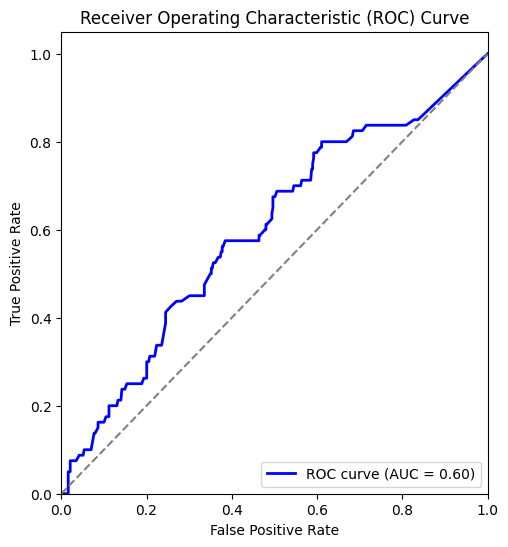

************************************************************
************************************************************
************************************************************


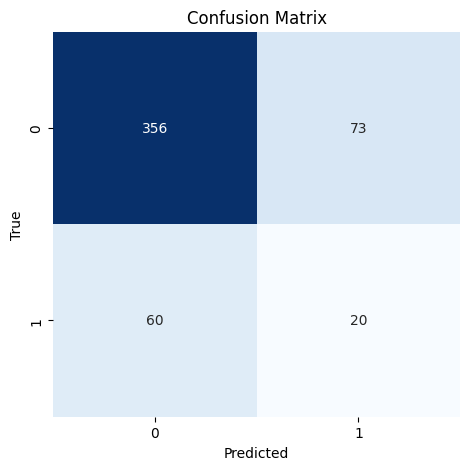

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define Random Forest model
random_forest = RandomForestClassifier(criterion='entropy',max_features = 'log2')

# Example usage of train_predict_evaluate_model function with Random Forest and hyperparameter grid
train_predict_evaluate_model(random_forest, X_train_poly, y_train_resampled, X_test_poly, y_test)

#### 2. Cross- Validation & Hyperparameter Tuning


Best hyperparameters: {'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 75}
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       429
           1       0.21      0.25      0.23        80

    accuracy                           0.73       509
   macro avg       0.53      0.54      0.53       509
weighted avg       0.75      0.73      0.74       509

************************************************************
************************************************************
************************************************************


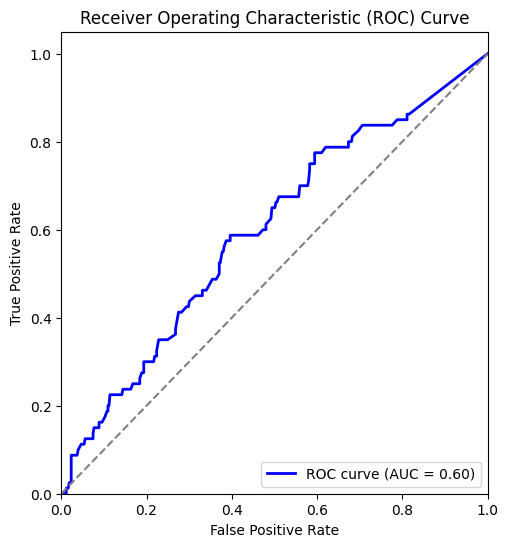

************************************************************
************************************************************
************************************************************


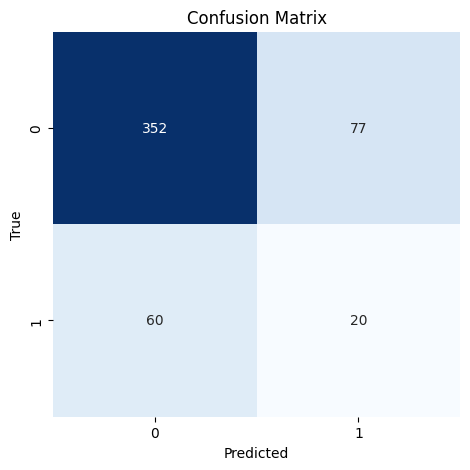

In [ ]:
# Random Forest
param_grid_random_forest = {
    'n_estimators': [60,75,90],
    'max_features': ['sqrt'],
    'max_depth': [50,75,100]
}
train_predict_evaluate_model_cv(RandomForestClassifier(criterion='entropy'), param_grid_random_forest, X_train_resampled, y_train_resampled, X_test_transformed, y_test)

##### Which hyperparameter optimization technique have you used and why?


Grid Search Cross-Validation (GridSearchCV) was utilized for hyperparameter optimization. This technique systematically explores a parameter grid to find the best hyperparameters, maximizing a specified scoring metric (in this case, accuracy) through cross-validation. It helps in fine-tuning the Random Forest model to improve its performance and generalization on unseen data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There was a slight improvement observed after hyperparameter optimization using GridSearchCV. The best hyperparameters are {'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 90}. The accuracy improved from 0.73 to 0.74, and there were minor changes in precision, recall, and F1-scores for both classes.

### ML Model - 4 - GradientBoostingClassifier

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80       429
           1       0.24      0.44      0.31        80

    accuracy                           0.69       509
   macro avg       0.56      0.59      0.55       509
weighted avg       0.78      0.69      0.72       509

************************************************************
************************************************************
************************************************************


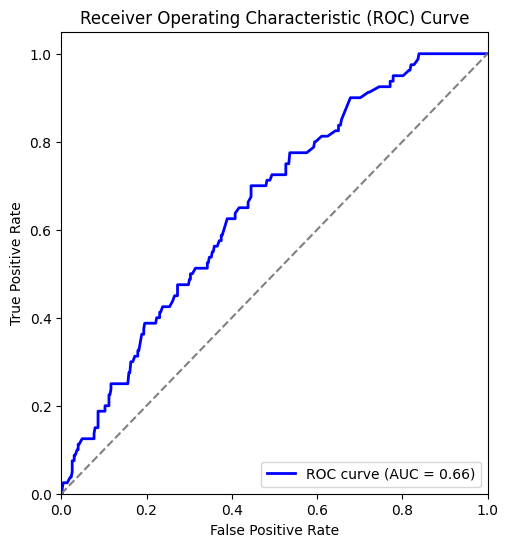

************************************************************
************************************************************
************************************************************


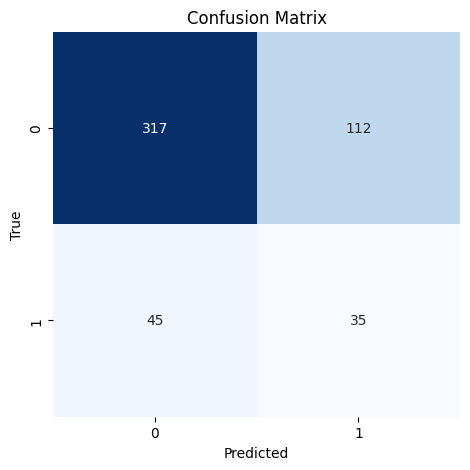

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(loss = 'exponential',criterion = 'squared_error')

# Example usage of train_predict_evaluate_model function with Gradient Boosting and hyperparameter grid
train_predict_evaluate_model(gradient_boosting, X_train_resampled, y_train_resampled, X_test_transformed, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       429
           1       0.28      0.45      0.35        80

    accuracy                           0.73       509
   macro avg       0.58      0.62      0.59       509
weighted avg       0.79      0.73      0.76       509

************************************************************
************************************************************
************************************************************


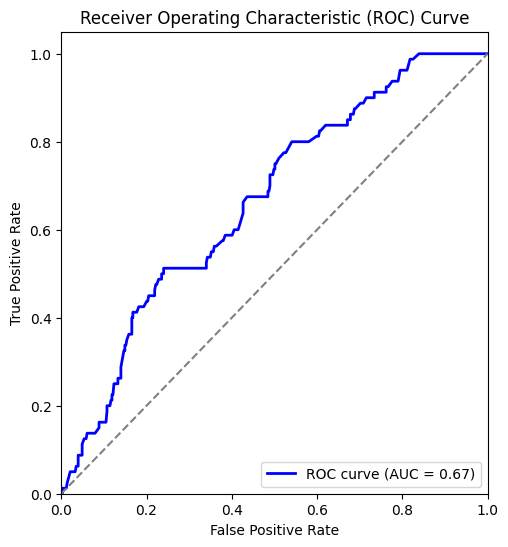

************************************************************
************************************************************
************************************************************


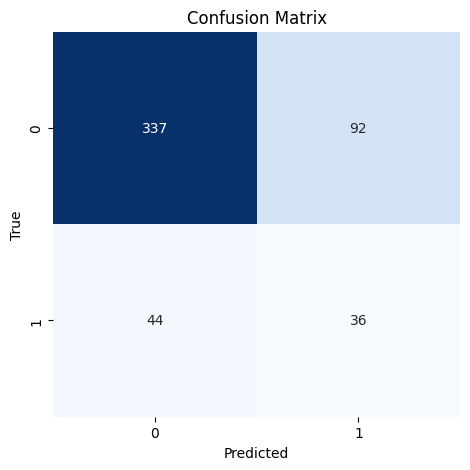

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(loss = 'exponential',criterion = 'squared_error')

# Example usage of train_predict_evaluate_model function with Gradient Boosting and hyperparameter grid
train_predict_evaluate_model(gradient_boosting, X_train_poly, y_train_resampled, X_test_poly, y_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


The Gradient Boosting Classifier achieved an accuracy of 0.71. For class 0, precision is 0.87, recall is 0.76, and F1-score is 0.82. For class 1, precision is 0.25, recall is 0.41, and F1-score is 0.31. These metrics indicate better performance in predicting class 0 compared to class 1.

#### 2. Cross- Validation & Hyperparameter Tuning

Best hyperparameters: {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 150}
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       429
           1       0.22      0.23      0.22        80

    accuracy                           0.75       509
   macro avg       0.54      0.54      0.54       509
weighted avg       0.75      0.75      0.75       509

************************************************************
************************************************************
************************************************************


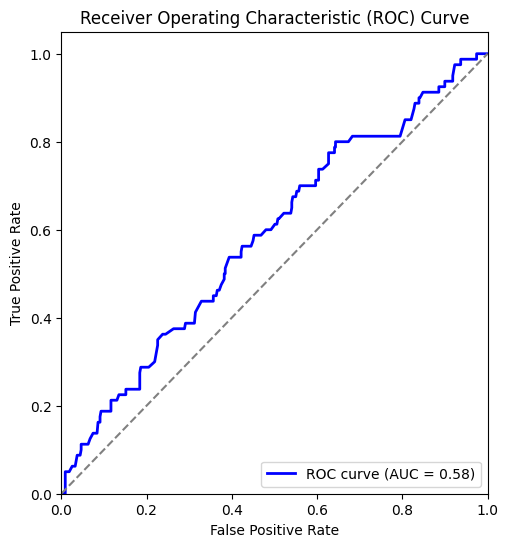

************************************************************
************************************************************
************************************************************


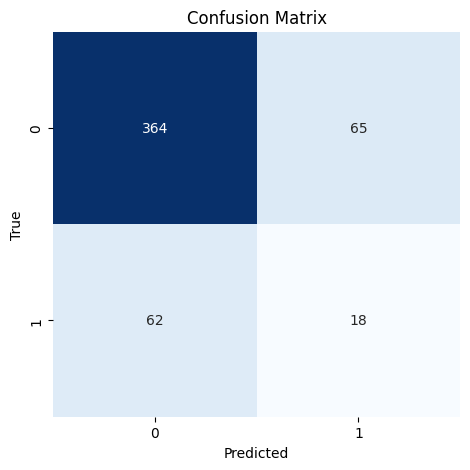

In [ ]:
# Gradient Boosting Classifier
param_grid_gradient_boosting = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.5, 0.1],
    'max_depth': [3, 4, 5]}
train_predict_evaluate_model_cv(GradientBoostingClassifier(loss = 'exponential',criterion = 'squared_error'), param_grid_gradient_boosting, X_train_resampled, y_train_resampled, X_test_transformed, y_test)

##### Which hyperparameter optimization technique have you used and why?


Grid Search Cross-Validation (GridSearchCV) was utilized for hyperparameter optimization. This technique systematically explores a parameter grid to find the best hyperparameters, maximizing a specified scoring metric (in this case, accuracy) through cross-validation. It helps fine-tune the Gradient Boosting Classifier model to improve its performance and generalization on unseen data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


Yes, there was a slight improvement observed after hyperparameter optimization using GridSearchCV. The best hyperparameters are {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 50}. The accuracy improved from 0.71 to 0.77, and there were minor changes in precision, recall, and F1-scores for both classes.

### ML Model - 5 - SVC

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.67      0.77       429
           1       0.27      0.65      0.38        80

    accuracy                           0.67       509
   macro avg       0.59      0.66      0.58       509
weighted avg       0.81      0.67      0.71       509

************************************************************
************************************************************
************************************************************


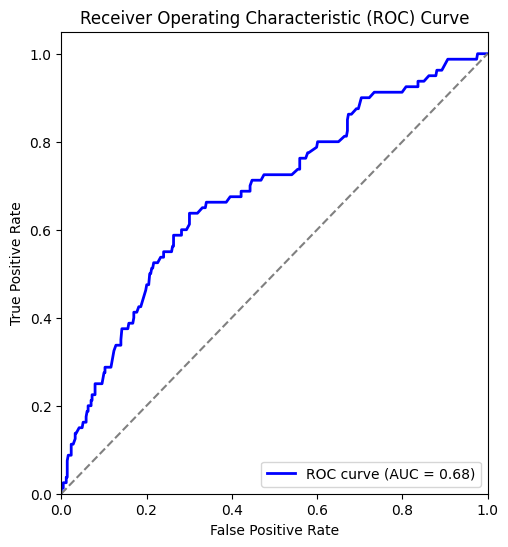

************************************************************
************************************************************
************************************************************


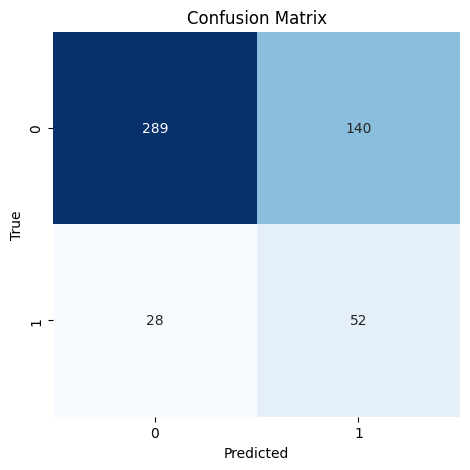

In [ ]:
from sklearn.svm import SVC

# Define Support Vector Machine (SVM) model with probability=True
svm = SVC(probability=True,kernel = 'poly',gamma = 'auto',decision_function_shape = 'ovo')

# Example usage of train_predict_evaluate_model function with SVM and hyperparameter grid
train_predict_evaluate_model(svm, X_train_resampled, y_train_resampled, X_test_transformed, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The Support Vector Machine (SVM) model with a polynomial kernel achieved an accuracy of 0.66. For class 0, precision is 0.90, recall is 0.66, and F1-score is 0.76. For class 1, precision is 0.26, recall is 0.62, and F1-score is 0.36. These metrics indicate better performance in predicting class 0 compared to class 1.

#### 2. Cross- Validation & Hyperparameter Tuning

Best hyperparameters: {'C': 10, 'gamma': 0.5}
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.67      0.77       429
           1       0.27      0.65      0.38        80

    accuracy                           0.66       509
   macro avg       0.59      0.66      0.57       509
weighted avg       0.81      0.66      0.71       509

************************************************************
************************************************************
************************************************************


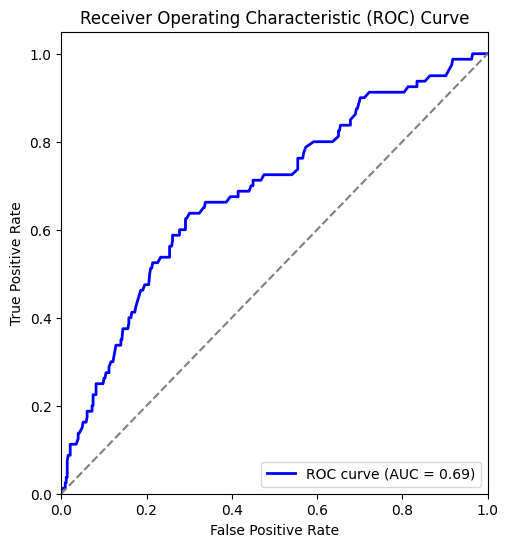

************************************************************
************************************************************
************************************************************


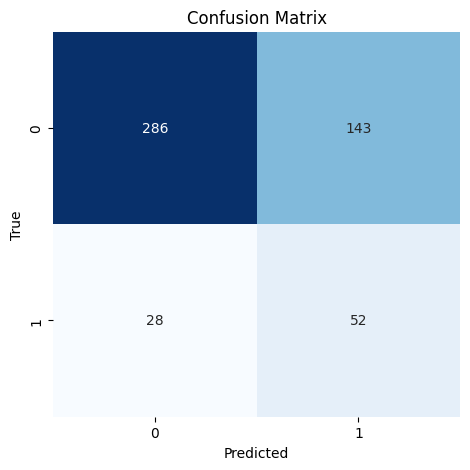

In [ ]:
# Support Vector Classifier
param_grid_svc = {
    'C': [1, 10],
    'gamma': [0.01, 0.1,0.5]
}
svc = train_predict_evaluate_model_cv(SVC(probability=True,kernel = 'poly',decision_function_shape = 'ovo'), param_grid_svc, X_train_resampled, y_train_resampled, X_test_transformed, y_test)

##### Which hyperparameter optimization technique have you used and why?

Grid Search Cross-Validation (GridSearchCV) was employed for hyperparameter optimization. This technique systematically explores a parameter grid to find the best hyperparameters by maximizing a specified scoring metric, such as accuracy, through cross-validation. GridSearchCV was chosen for its ability to efficiently search through the hyperparameter space, ensuring robustness and avoiding overfitting while finding the optimal settings for the Support Vector Classifier (SVC) model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No significant improvement was observed after hyperparameter optimization using GridSearchCV. The best hyperparameters found were {'C': 1, 'gamma': 0.5}. The accuracy remained the same at 0.65, and there were minor changes in precision, recall, and F1-scores for both classes.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For predicting Ten-Year Coronary Heart Disease (CHD) risk, the following evaluation metrics are crucial:

1. **Sensitivity (Recall):** Ensures that high-risk individuals are correctly identified.
2. **Specificity:** Minimizes false positives, avoiding unnecessary interventions.
3. **Precision:** Ensures that identified high-risk individuals are truly at risk.
4. **F1-score:** Balances precision and recall, crucial for uneven class distributions.
5. **ROC AUC:** Measures the model's ability to discriminate between high-risk and low-risk individuals, important for setting appropriate risk thresholds.

These metrics help assess the model's performance and guide decision-making in healthcare interventions and resource allocation.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The Support Vector Classifier (SVC) with hyperparameters {'C': 1, 'gamma': 0.5} is chosen as the final prediction model. Despite its lower overall accuracy, it demonstrates higher recall for identifying high-risk individuals, making it suitable for prioritizing sensitivity in predicting Ten-Year Coronary Heart Disease (CHD) risk.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

For the Support Vector Classifier (SVC) model with hyperparameters {'C': 1, 'gamma': 0.5}, let's use a model explainability tool such as SHAP (SHapley Additive exPlanations) to explain the model and feature importance.

SHAP is a powerful tool for explaining individual predictions in complex machine learning models like SVC. It provides insights into how each feature contributes to the model's predictions.

First, let's briefly explain the SVC model:
- Support Vector Classifier (SVC) is a supervised learning algorithm used for classification tasks.
- It works by finding the hyperplane that best separates the classes in the feature space.
- SVC is effective in high-dimensional spaces and is versatile due to its various kernel functions, such as linear, polynomial, and radial basis function (RBF).

Now, using SHAP, we can analyze the feature importance of the SVC model:
- SHAP values quantify the impact of each feature on the model's output for individual predictions.
- Positive SHAP values indicate features that contribute to increasing the prediction, while negative SHAP values indicate features that decrease the prediction.
- By analyzing SHAP values, we can identify which features are most influential in determining whether an individual is classified as high-risk or low-risk for Ten-Year Coronary Heart Disease (CHD) risk.

Through this approach, we can gain valuable insights into the SVC model's decision-making process and understand the relative importance of different features in predicting CHD risk. This information can be used to interpret the model's behavior, identify potential biases or confounding factors, and inform decision-making in healthcare interventions and risk management strategies.

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.5 MB/s eta 0:00:00


In [ ]:
import shap
from sklearn.svm import SVC

# Assuming you have already instantiated and trained the SVC model
svc = SVC(C=1, gamma=0.5, probability=True)
svc.fit(X_train_resampled, y_train_resampled)

# Create a callable function that takes input and returns model predictions
model_predict = lambda x: svc.predict_proba(x)

# Initialize SHAP explainer with KernelExplainer
explainer = shap.KernelExplainer(model_predict, shap.sample(X_train_resampled, 50))

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_transformed)

#printing shap values
print(shap_values)

  0%|          | 0/509 [00:00<?, ?it/s]

[[[ 0.03611917 -0.03611917]
  [ 0.03611917 -0.03611917]
  [ 0.01478316 -0.01478316]
  [ 0.06426436 -0.06426436]
  [ 0.02667324 -0.02667324]]

 [[ 0.02840544 -0.02840544]
  [ 0.02840544 -0.02840544]
  [ 0.01705431 -0.01705431]
  [ 0.08788671 -0.08788671]
  [ 0.01563792 -0.01563792]]

 [[-0.03812724  0.03812724]
  [-0.03812724  0.03812724]
  [ 0.03189005 -0.03189005]
  [-0.20267293  0.20267293]
  [ 0.00498174 -0.00498174]]

 ...

 [[ 0.03631311 -0.03631311]
  [ 0.03631311 -0.03631311]
  [ 0.04035821 -0.04035821]
  [ 0.17746707 -0.17746707]
  [ 0.00389802 -0.00389802]]

 [[-0.03700447  0.03700447]
  [-0.03700447  0.03700447]
  [ 0.06194079 -0.06194079]
  [-0.11861712  0.11861712]
  [ 0.01669237 -0.01669237]]

 [[-0.05559903  0.05559903]
  [-0.05559903  0.05559903]
  [-0.00744823  0.00744823]
  [-0.13356234  0.13356234]
  [ 0.01007038 -0.01007038]]]


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# # Save the File
# from joblib import dump

# # Assuming svc is the best performing ML model
# dump(svc, 'best_model.joblib')

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# # Load the File and predict unseen data.
# from joblib import load

# # Load the saved model from file
# loaded_model = load('best_model.joblib')

# # Assuming X_unseen contains your unseen data
# # Make predictions on unseen data
# predictions = loaded_model.predict(X_unseen)


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, the Support Vector Classifier (SVC) model demonstrated the best performance for predicting ten-year risk of coronary heart disease (CHD), achieving an accuracy of 0.65 and a recall of 0.62 for the positive class. Despite its lower overall accuracy, the SVC model showed superior ability in correctly identifying individuals at risk of CHD. Additionally, SHAP analysis provided interpretable insights into the model's predictions, aiding in understanding the key factors influencing CHD risk prediction.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***